In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.8MB/s eta 0:00:011
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 26.8MB/s ta 0:00:01
    100% |████████████████████████████████| 10.4MB 4.8MB/s eta 0:00:011
    100% |████████████████████████████████| 7.1MB 7.0MB/s eta 0:00:011
    100% |████████████████████████████████| 194kB 59.8MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 40.6MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 81kB 43.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
Successfully built ujson holidays
  Found existing installation: python-dateut

In [3]:
import gluonts
gluonts.__version__

'0.4.2'

In [4]:
import mxnet
mxnet.__version__

'1.4.1'

In [5]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar


INFO:root:Using CPU


In [6]:
dataname = "m4_monthly"
dataset = utils.get_dataset(dataname, regenerate=False)

INFO:root:downloading and processing m4_monthly


saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly/test/data.json


In [7]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_daily_domain', 'm4_daily_id', 'm4_hourly', 'm4_hourly_id', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_domain', 'm4_monthly_end032014', 'm4_monthly_end052015', 'm4_monthly_end092007', 'm4_monthly_finance', 'm4_monthly_id', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_micro_atm', 'm4_monthly_nonmicro_10975_seed42', 'm4_monthly_nonmicro_10975_seed43', 'm4_monthly_nonmicro_10975_seed44', 'm4_monthly_nonmicro_10975_seed45', 'm4_monthly_nonmicro_10975_seed46', 'm4_monthly_nonmicro_10975_seed47', 'm4_monthly_nonmicro_10975_seed48', 'm4_monthly_nonmicro_10975_seed49', 'm4_monthly_nonmicro_10975_seed50', 'm4_monthly_nonmicro_10975_seed51', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_domain', 'm4_quarterly_finance', 'm4_quarterly_id', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_qu

In [8]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

# check length of the series
print("length train dataset", len(dataset.train))
print("length test dataset", len(dataset.train))


dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])
length train dataset 48000
length test dataset 48000


In [9]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 8000.,  8350.,  8570.,  7700.,  7080.,  6520.,  6070.,  6650.,
         6830.,  5710.,  5260.,  5470.,  7870.,  7360.,  8470.,  7880.,
         6750.,  6860.,  6220.,  6650.,  5450.,  5280.,  4970.,  5550.,
         7750.,  7760.,  7190.,  7440.,  6590.,  6210.,  6010.,  6390.,
         5780.,  5700.,  4680.,  4970.,  6850.,  6740.,  7490.,  6250.,
         6900.,  5870.,  5610.,  6310.,  6110.,  6090.,  5810.,  6060.,
         6950.,  7820.,  8270.,  7840.,  7850.,  6710.,  6220.,  7430.,
         6560.,  7080.,  6680.,  6900.,  8680.,  8450.,  8670.,  8470.,
         7910.,  8140.,  7310.,  7860.,  7730.,  7330.,  7430.,  7150.,
         8720.,  8340.,  8840.,  8780.,  8250.,  8180.,  7570.,  9280.,
         9220.,  9140.,  8950.,  8540.,  9360.,  9750.,  9270.,  8690.,
         8200.,  7610.,  7160.,  8280.,  7370.,  7130.,  6840.,  7260.,
         7430.,  7950.,  7790.,  8090.,  7480.,  6700.,  6650.,  6960.,


## Plot Series

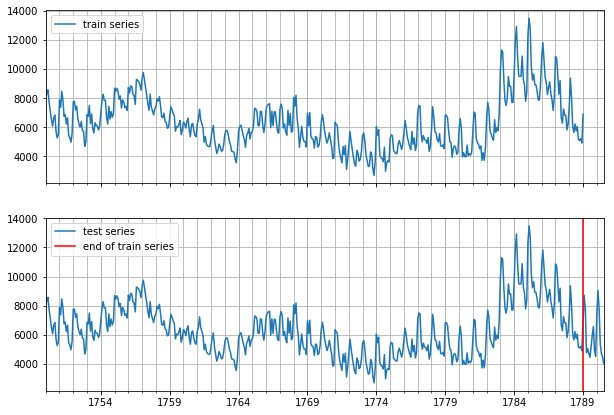

In [10]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [11]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepar import DeepAREstimator

In [12]:
######################
### deepar wrapper ###
def deepar(data="m4_quarterly", seed=42, epochs=100, batches=50):

    dataset = get_dataset(data, regenerate=False)
    mx.random.seed(seed)
    np.random.seed(seed)

    trainer = Trainer(
        ctx=mx.cpu(0),
        epochs=epochs,
        num_batches_per_epoch=batches,
        learning_rate=1e-3,
    )
    
    estimator = DeepAREstimator(
        trainer=trainer,
        cardinality= [
            feat_static_cat.cardinality 
            for feat_static_cat in dataset.metadata.feat_static_cat
        ],
        context_length=dataset.metadata.prediction_length,
        prediction_length=dataset.metadata.prediction_length,
        freq=dataset.metadata.freq,
        use_feat_static_cat=True
    )

    # predictor = estimator.train(training_data=dataset.train,
    #                             validation_data=dataset.test)
    predictor = estimator.train(training_data=dataset.train)

    forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

    agg_metrics, item_metrics = Evaluator()(
        ts_it, forecast_it, num_series=len(dataset.test)
    )

    metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
    output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

    output["seed"] = seed
    output["epochs"] = epochs
    output["num_batches"] = batches

    df = pd.DataFrame([output])

    return df

## Equalizing the playing field

In [13]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_monthly", seed=i, epochs=1500, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly.
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/100 [00:00<?, ?it/s]

Seed: 42


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:05<00:00, 18.31it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[0] Elapsed time 5.466 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.339743
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=7.59]
INFO:root:Epoch[1] Elapsed time 4.939 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.593208
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[2] Elapsed time 5.144 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.064031
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[3] Elapsed time 4.871 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.885445
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.38it/s, avg_epoch_los

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.562107
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[37] Elapsed time 4.843 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.220405
INFO:root:Loading parameters from best epoch (17)
INFO:root:Epoch[38] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=7.13]
INFO:root:Epoch[38] Elapsed time 4.845 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.130503
INFO:root:Epoch[39] Learning rate is 0.000125
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=7.65]
INFO:root:Epoch[39] Elapsed time 5.022 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.650110
INFO:root:Epoch[40] Learning rate is 0.000125
100%|██████████| 100/100 [00:04<00:00, 20.69it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[40] Elapsed time 4.838 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.44

INFO:root:Epoch[73] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[73] Elapsed time 4.852 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.381717
INFO:root:Epoch[74] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.87it/s, avg_epoch_loss=7.34]
INFO:root:Epoch[74] Elapsed time 4.793 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.336133
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[75] Elapsed time 4.852 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.064995
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.02it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[76] Elapsed time 4.998 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.415286
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=6.49]
IN

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.64it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[110] Elapsed time 4.847 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.612596
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.92it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[111] Elapsed time 4.785 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.213229
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[112] Elapsed time 4.858 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.897016
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=7.74]
INFO:root:Epoch[113] Elapsed time 4.951 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.735886
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.37it/s, avg_epoch_l

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.942593
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.96it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[147] Elapsed time 5.011 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.483937
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.58it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[148] Elapsed time 4.862 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.223253
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[149] Elapsed time 4.810 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.961318
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.42it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[150] Elapsed time 5.152 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.784333
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[183] Elapsed time 5.141 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.688744
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.91it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[184] Elapsed time 4.786 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.794486
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.93it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[185] Elapsed time 4.782 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.308059
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.89it/s, avg_epoch_loss=5.95]
INFO:root:Epoch[186] Elapsed time 4.792 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.950412
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.89it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[220] Elapsed time 4.920 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.459163
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.32it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[221] Elapsed time 5.181 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.892856
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[222] Elapsed time 4.838 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.943647
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[223] Elapsed time 4.893 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.340630
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.70it/s, avg_epoch_

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.442852
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[257] Elapsed time 4.885 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.762918
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[258] Elapsed time 5.074 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.314041
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.75it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[259] Elapsed time 4.822 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.891253
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.84it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[260] Elapsed time 4.801 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.188623
INFO:root:Epoch[261] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.07it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[293] Elapsed time 4.984 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.803803
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[294] Elapsed time 4.869 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.761313
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[295] Elapsed time 4.935 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.621924
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.82it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[296] Elapsed time 5.048 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.692393
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.79it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[297] Elapsed time 

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[330] Elapsed time 5.029 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.977173
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[331] Elapsed time 4.870 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.682223
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[332] Elapsed time 5.008 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.735933
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.10it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[333] Elapsed time 4.978 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.900222
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.82it/s, avg_epoch_l

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.552247
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.69it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[367] Elapsed time 4.837 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.520898
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.97it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[368] Elapsed time 5.012 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.921547
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[369] Elapsed time 4.842 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.606679
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.02it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[370] Elapsed time 4.998 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.542379
INFO:root:Epoch[371] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[403] Elapsed time 4.827 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.785470
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[404] Elapsed time 4.933 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.624864
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[405] Elapsed time 4.934 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.493610
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[406] Elapsed time 4.899 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.100171
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[407] Elapsed time 5

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[440] Elapsed time 4.807 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.850653
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.61it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[441] Elapsed time 4.854 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.496253
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_loss=7.29]
INFO:root:Epoch[442] Elapsed time 4.948 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.293639
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[443] Elapsed time 4.899 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.047520
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.37it/s, avg_epoch_l

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.562034
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 21.06it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[477] Elapsed time 4.751 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.535486
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.76it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[478] Elapsed time 4.818 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.832220
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.35it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[479] Elapsed time 4.917 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.557269
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[480] Elapsed time 4.897 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.466859
INFO:root:Epoch[481] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.96it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[513] Elapsed time 4.775 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=5.296452
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.87it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[514] Elapsed time 4.794 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.266700
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.97it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[515] Elapsed time 4.772 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=5.837900
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.79it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[516] Elapsed time 4.813 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=5.473352
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.30it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[517] Elapsed time 

INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[550] Elapsed time 4.883 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.553618
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[551] Elapsed time 5.109 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.514141
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[552] Elapsed time 4.827 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=5.554550
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=6.84]
INFO:root:Epoch[553] Elapsed time 4.816 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.844435
INFO:root:Epoch[554] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_

INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.431896
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.64it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[587] Elapsed time 5.095 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.610455
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.92it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[588] Elapsed time 4.784 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=5.417437
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[589] Elapsed time 4.871 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.250913
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[590] Elapsed time 4.810 seconds
INFO:root:Epoch[590] Evaluation metric 'epoch_loss'=5.706145
INFO:root:Epoch[591] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.59it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[623] Elapsed time 4.861 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=5.495366
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[624] Elapsed time 4.913 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.364144
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[625] Elapsed time 5.043 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.666206
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[626] Elapsed time 4.895 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=5.845062
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[627] Elapsed time 

INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[660] Elapsed time 4.878 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=5.270237
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[661] Elapsed time 4.905 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.679374
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[662] Elapsed time 5.097 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.090534
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[663] Elapsed time 4.815 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=5.800644
INFO:root:Epoch[664] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.76it/s, avg_epoch_l

INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.356415
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[697] Elapsed time 5.021 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.988458
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.64it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[698] Elapsed time 4.849 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=5.477502
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[699] Elapsed time 4.928 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.394649
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.74it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[700] Elapsed time 5.069 seconds
INFO:root:Epoch[700] Evaluation metric 'epoch_loss'=6.732535
INFO:root:Epoch[701] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[733] Elapsed time 4.810 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.690512
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[734] Elapsed time 5.056 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.006347
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[735] Elapsed time 4.868 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=5.327153
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[736] Elapsed time 4.927 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.670107
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.81it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[737] Elapsed time

INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[770] Elapsed time 4.838 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=5.498175
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.76it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[771] Elapsed time 4.818 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=6.301552
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.86it/s, avg_epoch_loss=6.98]
INFO:root:Epoch[772] Elapsed time 5.040 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=6.981076
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[773] Elapsed time 4.852 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=5.446738
INFO:root:Epoch[774] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_lo

INFO:root:Epoch[806] Evaluation metric 'epoch_loss'=5.522895
INFO:root:Epoch[807] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[807] Elapsed time 4.827 seconds
INFO:root:Epoch[807] Evaluation metric 'epoch_loss'=6.326765
INFO:root:Epoch[808] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[808] Elapsed time 4.827 seconds
INFO:root:Epoch[808] Evaluation metric 'epoch_loss'=6.706957
INFO:root:Epoch[809] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.96it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[809] Elapsed time 5.013 seconds
INFO:root:Epoch[809] Evaluation metric 'epoch_loss'=5.925062
INFO:root:Epoch[810] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=5.37]
INFO:root:Epoch[810] Elapsed time 4.898 seconds
INFO:root:Epoch[810] Evaluation metric 'epoch_loss'=5.367817
INFO:root:Epoch[811] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.75it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[843] Elapsed time 4.821 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=5.890818
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.83it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[844] Elapsed time 4.804 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=6.017293
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[845] Elapsed time 4.828 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=5.429965
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[846] Elapsed time 4.838 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=6.471516
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.99it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[847] Elapsed time

INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.82it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[880] Elapsed time 5.049 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=6.557620
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.76it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[881] Elapsed time 4.820 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=5.495360
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.74it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[882] Elapsed time 4.824 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=6.749826
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[883] Elapsed time 4.871 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=6.502794
INFO:root:Epoch[884] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_lo

INFO:root:Epoch[916] Evaluation metric 'epoch_loss'=6.795780
INFO:root:Epoch[917] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[917] Elapsed time 4.852 seconds
INFO:root:Epoch[917] Evaluation metric 'epoch_loss'=5.422370
INFO:root:Epoch[918] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[918] Elapsed time 4.815 seconds
INFO:root:Epoch[918] Evaluation metric 'epoch_loss'=6.113092
INFO:root:Epoch[919] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.86it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[919] Elapsed time 4.797 seconds
INFO:root:Epoch[919] Evaluation metric 'epoch_loss'=5.878631
INFO:root:Epoch[920] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.65it/s, avg_epoch_loss=5.4]
INFO:root:Epoch[920] Elapsed time 4.846 seconds
INFO:root:Epoch[920] Evaluation metric 'epoch_loss'=5.401734
INFO:root:Epoch[921] Learning rate is 5e-05


100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[953] Elapsed time 4.895 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=5.671110
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[954] Elapsed time 4.923 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=6.535714
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[955] Elapsed time 5.045 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=6.566819
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.85it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[956] Elapsed time 4.800 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=5.389503
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[957] Elapsed time

INFO:root:Epoch[990] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.46it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[990] Elapsed time 4.890 seconds
INFO:root:Epoch[990] Evaluation metric 'epoch_loss'=5.608447
INFO:root:Epoch[991] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.79it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[991] Elapsed time 5.055 seconds
INFO:root:Epoch[991] Evaluation metric 'epoch_loss'=6.812799
INFO:root:Epoch[992] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[992] Elapsed time 4.886 seconds
INFO:root:Epoch[992] Evaluation metric 'epoch_loss'=5.542521
INFO:root:Epoch[993] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.70it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[993] Elapsed time 4.833 seconds
INFO:root:Epoch[993] Evaluation metric 'epoch_loss'=5.983122
INFO:root:Epoch[994] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.75it/s, avg_epoch_

100%|██████████| 100/100 [00:04<00:00, 20.57it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1026] Elapsed time 4.866 seconds
INFO:root:Epoch[1026] Evaluation metric 'epoch_loss'=6.452258
INFO:root:Epoch[1027] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[1027] Elapsed time 4.993 seconds
INFO:root:Epoch[1027] Evaluation metric 'epoch_loss'=6.670859
INFO:root:Epoch[1028] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[1028] Elapsed time 4.856 seconds
INFO:root:Epoch[1028] Evaluation metric 'epoch_loss'=5.504489
INFO:root:Epoch[1029] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[1029] Elapsed time 4.947 seconds
INFO:root:Epoch[1029] Evaluation metric 'epoch_loss'=6.504132
INFO:root:Epoch[1030] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[1030] E

100%|██████████| 100/100 [00:04<00:00, 20.83it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[1062] Elapsed time 4.804 seconds
INFO:root:Epoch[1062] Evaluation metric 'epoch_loss'=6.410958
INFO:root:Epoch[1063] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1063] Elapsed time 4.841 seconds
INFO:root:Epoch[1063] Evaluation metric 'epoch_loss'=6.648291
INFO:root:Epoch[1064] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.82it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[1064] Elapsed time 5.046 seconds
INFO:root:Epoch[1064] Evaluation metric 'epoch_loss'=5.780482
INFO:root:Epoch[1065] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[1065] Elapsed time 4.871 seconds
INFO:root:Epoch[1065] Evaluation metric 'epoch_loss'=5.484612
INFO:root:Epoch[1066] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1066]

100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[1098] Elapsed time 4.840 seconds
INFO:root:Epoch[1098] Evaluation metric 'epoch_loss'=6.013388
INFO:root:Epoch[1099] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[1099] Elapsed time 4.831 seconds
INFO:root:Epoch[1099] Evaluation metric 'epoch_loss'=5.851915
INFO:root:Epoch[1100] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.39]
INFO:root:Epoch[1100] Elapsed time 4.883 seconds
INFO:root:Epoch[1100] Evaluation metric 'epoch_loss'=5.390721
INFO:root:Epoch[1101] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[1101] Elapsed time 4.927 seconds
INFO:root:Epoch[1101] Evaluation metric 'epoch_loss'=6.771905
INFO:root:Epoch[1102] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.09it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[1102]

100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[1134] Elapsed time 4.930 seconds
INFO:root:Epoch[1134] Evaluation metric 'epoch_loss'=6.481862
INFO:root:Epoch[1135] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.81it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[1135] Elapsed time 5.050 seconds
INFO:root:Epoch[1135] Evaluation metric 'epoch_loss'=6.466714
INFO:root:Epoch[1136] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[1136] Elapsed time 4.828 seconds
INFO:root:Epoch[1136] Evaluation metric 'epoch_loss'=5.454659
INFO:root:Epoch[1137] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1137] Elapsed time 4.842 seconds
INFO:root:Epoch[1137] Evaluation metric 'epoch_loss'=6.786157
INFO:root:Epoch[1138] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.96it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[1138]

100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1170] Elapsed time 4.923 seconds
INFO:root:Epoch[1170] Evaluation metric 'epoch_loss'=6.120807
INFO:root:Epoch[1171] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.42it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[1171] Elapsed time 5.153 seconds
INFO:root:Epoch[1171] Evaluation metric 'epoch_loss'=6.704781
INFO:root:Epoch[1172] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.84it/s, avg_epoch_loss=5.17]
INFO:root:Epoch[1172] Elapsed time 4.801 seconds
INFO:root:Epoch[1172] Evaluation metric 'epoch_loss'=5.166656
INFO:root:Epoch[1173] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.79it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[1173] Elapsed time 4.814 seconds
INFO:root:Epoch[1173] Evaluation metric 'epoch_loss'=6.218451
INFO:root:Epoch[1174] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[1174] 

100%|██████████| 100/100 [00:04<00:00, 20.08it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[1206] Elapsed time 4.984 seconds
INFO:root:Epoch[1206] Evaluation metric 'epoch_loss'=7.278291
INFO:root:Epoch[1207] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.47it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[1207] Elapsed time 4.887 seconds
INFO:root:Epoch[1207] Evaluation metric 'epoch_loss'=5.860714
INFO:root:Epoch[1208] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.38it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[1208] Elapsed time 4.910 seconds
INFO:root:Epoch[1208] Evaluation metric 'epoch_loss'=5.750151
INFO:root:Epoch[1209] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[1209] Elapsed time 4.933 seconds
INFO:root:Epoch[1209] Evaluation metric 'epoch_loss'=6.517581
INFO:root:Epoch[1210] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[1210]

100%|██████████| 100/100 [00:04<00:00, 20.70it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[1242] Elapsed time 4.834 seconds
INFO:root:Epoch[1242] Evaluation metric 'epoch_loss'=6.786715
INFO:root:Epoch[1243] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.74it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[1243] Elapsed time 5.068 seconds
INFO:root:Epoch[1243] Evaluation metric 'epoch_loss'=6.587190
INFO:root:Epoch[1244] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[1244] Elapsed time 4.842 seconds
INFO:root:Epoch[1244] Evaluation metric 'epoch_loss'=5.100913
INFO:root:Epoch[1245] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.33it/s, avg_epoch_loss=6.06]
INFO:root:Epoch[1245] Elapsed time 4.920 seconds
INFO:root:Epoch[1245] Evaluation metric 'epoch_loss'=6.058100
INFO:root:Epoch[1246] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.50it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[1246] 

100%|██████████| 100/100 [00:05<00:00, 19.36it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[1278] Elapsed time 5.167 seconds
INFO:root:Epoch[1278] Evaluation metric 'epoch_loss'=6.217629
INFO:root:Epoch[1279] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[1279] Elapsed time 4.809 seconds
INFO:root:Epoch[1279] Evaluation metric 'epoch_loss'=5.733772
INFO:root:Epoch[1280] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.38]
INFO:root:Epoch[1280] Elapsed time 4.879 seconds
INFO:root:Epoch[1280] Evaluation metric 'epoch_loss'=5.383199
INFO:root:Epoch[1281] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=7.23]
INFO:root:Epoch[1281] Elapsed time 5.020 seconds
INFO:root:Epoch[1281] Evaluation metric 'epoch_loss'=7.227020
INFO:root:Epoch[1282] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[1282]

100%|██████████| 100/100 [00:05<00:00, 17.87it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[1314] Elapsed time 5.599 seconds
INFO:root:Epoch[1314] Evaluation metric 'epoch_loss'=6.517258
INFO:root:Epoch[1315] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[1315] Elapsed time 5.048 seconds
INFO:root:Epoch[1315] Evaluation metric 'epoch_loss'=6.380267
INFO:root:Epoch[1316] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[1316] Elapsed time 4.811 seconds
INFO:root:Epoch[1316] Evaluation metric 'epoch_loss'=5.407501
INFO:root:Epoch[1317] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1317] Elapsed time 4.829 seconds
INFO:root:Epoch[1317] Evaluation metric 'epoch_loss'=6.776511
INFO:root:Epoch[1318] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.05it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[1318]

100%|██████████| 100/100 [00:05<00:00, 17.88it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[1350] Elapsed time 5.597 seconds
INFO:root:Epoch[1350] Evaluation metric 'epoch_loss'=6.160050
INFO:root:Epoch[1351] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1351] Elapsed time 5.139 seconds
INFO:root:Epoch[1351] Evaluation metric 'epoch_loss'=6.719649
INFO:root:Epoch[1352] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.75it/s, avg_epoch_loss=5.21]
INFO:root:Epoch[1352] Elapsed time 4.823 seconds
INFO:root:Epoch[1352] Evaluation metric 'epoch_loss'=5.214295
INFO:root:Epoch[1353] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.65it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[1353] Elapsed time 4.848 seconds
INFO:root:Epoch[1353] Evaluation metric 'epoch_loss'=6.192523
INFO:root:Epoch[1354] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.79it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[1354]

100%|██████████| 100/100 [00:05<00:00, 19.77it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1386] Elapsed time 5.060 seconds
INFO:root:Epoch[1386] Evaluation metric 'epoch_loss'=7.158569
INFO:root:Epoch[1387] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.24it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[1387] Elapsed time 5.485 seconds
INFO:root:Epoch[1387] Evaluation metric 'epoch_loss'=5.986447
INFO:root:Epoch[1388] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[1388] Elapsed time 4.935 seconds
INFO:root:Epoch[1388] Evaluation metric 'epoch_loss'=5.717826
INFO:root:Epoch[1389] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[1389] Elapsed time 4.930 seconds
INFO:root:Epoch[1389] Evaluation metric 'epoch_loss'=6.508416
INFO:root:Epoch[1390] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[1390]

100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1422] Elapsed time 4.816 seconds
INFO:root:Epoch[1422] Evaluation metric 'epoch_loss'=6.657949
INFO:root:Epoch[1423] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 17.36it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[1423] Elapsed time 5.761 seconds
INFO:root:Epoch[1423] Evaluation metric 'epoch_loss'=6.491410
INFO:root:Epoch[1424] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=4.98]
INFO:root:Epoch[1424] Elapsed time 4.897 seconds
INFO:root:Epoch[1424] Evaluation metric 'epoch_loss'=4.981447
INFO:root:Epoch[1425] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[1425] Elapsed time 4.892 seconds
INFO:root:Epoch[1425] Evaluation metric 'epoch_loss'=6.323949
INFO:root:Epoch[1426] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.54it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1426]

100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1458] Elapsed time 4.882 seconds
INFO:root:Epoch[1458] Evaluation metric 'epoch_loss'=6.122319
INFO:root:Epoch[1459] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1459] Elapsed time 4.872 seconds
INFO:root:Epoch[1459] Evaluation metric 'epoch_loss'=5.629700
INFO:root:Epoch[1460] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.25it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1460] Elapsed time 5.485 seconds
INFO:root:Epoch[1460] Evaluation metric 'epoch_loss'=5.627739
INFO:root:Epoch[1461] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=7.18]
INFO:root:Epoch[1461] Elapsed time 5.047 seconds
INFO:root:Epoch[1461] Evaluation metric 'epoch_loss'=7.176802
INFO:root:Epoch[1462] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[1462] 

100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[1494] Elapsed time 4.943 seconds
INFO:root:Epoch[1494] Evaluation metric 'epoch_loss'=6.489117
INFO:root:Epoch[1495] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.81it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[1495] Elapsed time 5.051 seconds
INFO:root:Epoch[1495] Evaluation metric 'epoch_loss'=6.401164
INFO:root:Epoch[1496] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 18.21it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[1496] Elapsed time 5.495 seconds
INFO:root:Epoch[1496] Evaluation metric 'epoch_loss'=5.416708
INFO:root:Epoch[1497] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[1497] Elapsed time 4.830 seconds
INFO:root:Epoch[1497] Evaluation metric 'epoch_loss'=6.756205
INFO:root:Epoch[1498] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.10it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[1498] 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.064231  0.134659  12.846423            0.122168            0.072198   

   seed  epochs  num_batches  
0    42    1500          100  
Seed: 43


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_loss=7.67]
INFO:root:Epoch[0] Elapsed time 5.173 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.672763
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=7.71]
INFO:root:Epoch[1] Elapsed time 4.992 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.710754
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.38it/s, avg_epoch_loss=7.07]
INFO:root:Epoch[2] Elapsed time 5.163 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.072100
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.31it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 4.927 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.832799
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.16it/s, avg_epoch_los

100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[37] Elapsed time 4.882 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.905380
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.34it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[38] Elapsed time 4.917 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.172745
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[39] Elapsed time 4.931 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.639788
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[40] Elapsed time 4.885 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.200950
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[41] Elapsed time 4.956 seconds

100%|██████████| 100/100 [00:04<00:00, 20.82it/s, avg_epoch_loss=6.88]
INFO:root:Epoch[74] Elapsed time 4.808 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.881898
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.90it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[75] Elapsed time 5.028 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.768326
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_epoch_loss=5.29]
INFO:root:Epoch[76] Elapsed time 4.832 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.285188
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[77] Elapsed time 4.939 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.585707
INFO:root:Epoch[78] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoc

INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[110] Elapsed time 4.850 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.375949
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.65it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[111] Elapsed time 4.845 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=5.913232
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[112] Elapsed time 4.886 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=5.856688
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=7.93]
INFO:root:Epoch[113] Elapsed time 5.046 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.931393
INFO:root:Epoch[114] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.46it/s, avg_epoch_

INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.813688
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[147] Elapsed time 4.947 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.252282
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[148] Elapsed time 4.851 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.138761
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=7.09]
INFO:root:Epoch[149] Elapsed time 4.857 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=7.086699
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.70it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[150] Elapsed time 5.080 seconds
INFO:root:Epoch[150] Evaluation metric 'epoch_loss'=6.362519
INFO:root:Epoch[151] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[183] Elapsed time 5.150 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.163178
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_loss=5.94]
INFO:root:Epoch[184] Elapsed time 4.961 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.937144
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.15it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[185] Elapsed time 4.965 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.147439
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[186] Elapsed time 4.951 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.708730
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[187] Elapsed time

INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.08it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[220] Elapsed time 4.985 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.670253
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[221] Elapsed time 5.127 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.803087
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.62]
INFO:root:Epoch[222] Elapsed time 4.842 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=5.621648
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[223] Elapsed time 4.851 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.640188
INFO:root:Epoch[224] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.47it/s, avg_epoch_l

INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.670442
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[257] Elapsed time 5.033 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.777771
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[258] Elapsed time 5.010 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=5.901082
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.69it/s, avg_epoch_loss=6]
INFO:root:Epoch[259] Elapsed time 4.837 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.998576
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[260] Elapsed time 4.866 seconds
INFO:root:Epoch[260] Evaluation metric 'epoch_loss'=6.111452
INFO:root:Epoch[261] Learning rate is 5e-05
100

100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=6.99]
INFO:root:Epoch[293] Elapsed time 5.031 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.986750
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.34it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[294] Elapsed time 4.921 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.666936
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[295] Elapsed time 5.019 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.556302
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.58it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[296] Elapsed time 5.111 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.778071
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.64it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[297] Elapsed time

INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.56it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[330] Elapsed time 5.115 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=5.630244
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[331] Elapsed time 4.933 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.758256
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.70it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[332] Elapsed time 5.079 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.869036
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.25it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[333] Elapsed time 4.941 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=5.644354
INFO:root:Epoch[334] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.20it/s, avg_epoch_

INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.507945
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[367] Elapsed time 4.962 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=7.159296
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.10it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[368] Elapsed time 4.981 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.533008
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.13it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[369] Elapsed time 4.969 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=5.786694
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[370] Elapsed time 4.958 seconds
INFO:root:Epoch[370] Evaluation metric 'epoch_loss'=6.586718
INFO:root:Epoch[371] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[403] Elapsed time 4.857 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.805332
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.03it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[404] Elapsed time 4.996 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.595231
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.13it/s, avg_epoch_loss=5.43]
INFO:root:Epoch[405] Elapsed time 4.971 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=5.430918
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[406] Elapsed time 4.932 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.013894
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=6.81]
INFO:root:Epoch[407] Elapsed time 

INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.77it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[440] Elapsed time 4.819 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.782549
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[441] Elapsed time 4.871 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.419908
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.25it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[442] Elapsed time 4.941 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=7.322228
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[443] Elapsed time 4.942 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.148981
INFO:root:Epoch[444] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_

INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.402316
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[477] Elapsed time 4.844 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=5.681325
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.74it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[478] Elapsed time 4.825 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.724408
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[479] Elapsed time 5.135 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.571439
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=5.13]
INFO:root:Epoch[480] Elapsed time 4.899 seconds
INFO:root:Epoch[480] Evaluation metric 'epoch_loss'=5.131780
INFO:root:Epoch[481] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[513] Elapsed time 4.878 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=5.316447
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[514] Elapsed time 4.878 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.192103
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[515] Elapsed time 4.907 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=5.744151
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[516] Elapsed time 4.884 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=5.647318
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.47]
INFO:root:Epoch[517] Elapsed time

INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.12it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[550] Elapsed time 4.973 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.609022
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.09it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[551] Elapsed time 4.980 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.221673
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[552] Elapsed time 4.843 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=5.790446
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.74it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[553] Elapsed time 4.824 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.704801
INFO:root:Epoch[554] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_l

INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.663149
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[587] Elapsed time 5.171 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.250454
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[588] Elapsed time 4.878 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=5.548984
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[589] Elapsed time 4.887 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.108772
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[590] Elapsed time 4.853 seconds
INFO:root:Epoch[590] Evaluation metric 'epoch_loss'=5.689177
INFO:root:Epoch[591] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[623] Elapsed time 4.844 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=5.606584
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[624] Elapsed time 4.962 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.054990
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[625] Elapsed time 5.009 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.651952
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[626] Elapsed time 4.948 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.077471
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[627] Elapsed time

INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=5.06]
INFO:root:Epoch[660] Elapsed time 4.956 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=5.058450
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.12it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[661] Elapsed time 4.971 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.295685
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.25it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[662] Elapsed time 5.199 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.686076
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.58it/s, avg_epoch_loss=5.28]
INFO:root:Epoch[663] Elapsed time 4.862 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=5.278181
INFO:root:Epoch[664] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_l

INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=5.619197
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.43it/s, avg_epoch_loss=7.32]
INFO:root:Epoch[697] Elapsed time 5.150 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=7.317639
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.38it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[698] Elapsed time 4.909 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=5.664724
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[699] Elapsed time 4.960 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.851835
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[700] Elapsed time 4.974 seconds
INFO:root:Epoch[700] Evaluation metric 'epoch_loss'=6.552964
INFO:root:Epoch[701] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.30it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[733] Elapsed time 4.930 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.637062
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[734] Elapsed time 5.140 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.476214
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=4.9]
INFO:root:Epoch[735] Elapsed time 4.899 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=4.895162
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[736] Elapsed time 4.947 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.418803
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.34it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[737] Elapsed time 5

INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.52it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[770] Elapsed time 4.878 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=5.685241
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.6]
INFO:root:Epoch[771] Elapsed time 4.887 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=5.603020
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_loss=7.27]
INFO:root:Epoch[772] Elapsed time 5.069 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=7.268331
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[773] Elapsed time 4.898 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=5.642538
INFO:root:Epoch[774] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_l

INFO:root:Epoch[806] Evaluation metric 'epoch_loss'=6.405599
INFO:root:Epoch[807] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[807] Elapsed time 4.831 seconds
INFO:root:Epoch[807] Evaluation metric 'epoch_loss'=5.459919
INFO:root:Epoch[808] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[808] Elapsed time 4.874 seconds
INFO:root:Epoch[808] Evaluation metric 'epoch_loss'=6.711777
INFO:root:Epoch[809] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.83it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[809] Elapsed time 5.047 seconds
INFO:root:Epoch[809] Evaluation metric 'epoch_loss'=6.550687
INFO:root:Epoch[810] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=5.1]
INFO:root:Epoch[810] Elapsed time 4.895 seconds
INFO:root:Epoch[810] Evaluation metric 'epoch_loss'=5.098887
INFO:root:Epoch[811] Learning rate is 5e-05


100%|██████████| 100/100 [00:04<00:00, 20.70it/s, avg_epoch_loss=5.25]
INFO:root:Epoch[843] Elapsed time 4.835 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=5.249756
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[844] Elapsed time 4.859 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=6.161131
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.61it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[845] Elapsed time 4.856 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=5.695207
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[846] Elapsed time 4.872 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=5.438277
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.96it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[847] Elapsed time 

INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.65it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[880] Elapsed time 5.093 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=6.575459
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.03it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[881] Elapsed time 4.996 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=6.012865
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[882] Elapsed time 4.868 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=5.847202
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.64it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[883] Elapsed time 4.848 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=6.737259
INFO:root:Epoch[884] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.62it/s, avg_epoch_

INFO:root:Epoch[916] Evaluation metric 'epoch_loss'=6.570984
INFO:root:Epoch[917] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.52it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[917] Elapsed time 5.126 seconds
INFO:root:Epoch[917] Evaluation metric 'epoch_loss'=6.404489
INFO:root:Epoch[918] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=5.42]
INFO:root:Epoch[918] Elapsed time 4.809 seconds
INFO:root:Epoch[918] Evaluation metric 'epoch_loss'=5.418738
INFO:root:Epoch[919] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.59it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[919] Elapsed time 4.860 seconds
INFO:root:Epoch[919] Evaluation metric 'epoch_loss'=6.123910
INFO:root:Epoch[920] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.83it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[920] Elapsed time 4.803 seconds
INFO:root:Epoch[920] Evaluation metric 'epoch_loss'=5.649798
INFO:root:Epoch[921] Learning rate is 5e-05


100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[953] Elapsed time 4.906 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=5.441634
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[954] Elapsed time 4.937 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=6.076237
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[955] Elapsed time 5.067 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=6.544120
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.14it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[956] Elapsed time 4.967 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=5.990681
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.42it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[957] Elapsed time 

INFO:root:Epoch[990] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=4.84]
INFO:root:Epoch[990] Elapsed time 4.905 seconds
INFO:root:Epoch[990] Evaluation metric 'epoch_loss'=4.844283
INFO:root:Epoch[991] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[991] Elapsed time 4.909 seconds
INFO:root:Epoch[991] Evaluation metric 'epoch_loss'=6.621206
INFO:root:Epoch[992] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.35it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[992] Elapsed time 5.171 seconds
INFO:root:Epoch[992] Evaluation metric 'epoch_loss'=6.325911
INFO:root:Epoch[993] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[993] Elapsed time 4.830 seconds
INFO:root:Epoch[993] Evaluation metric 'epoch_loss'=5.451389
INFO:root:Epoch[994] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.59it/s, avg_epoch_

100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1026] Elapsed time 4.905 seconds
INFO:root:Epoch[1026] Evaluation metric 'epoch_loss'=5.694786
INFO:root:Epoch[1027] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.84it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[1027] Elapsed time 5.042 seconds
INFO:root:Epoch[1027] Evaluation metric 'epoch_loss'=7.045424
INFO:root:Epoch[1028] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[1028] Elapsed time 4.917 seconds
INFO:root:Epoch[1028] Evaluation metric 'epoch_loss'=5.460708
INFO:root:Epoch[1029] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[1029] Elapsed time 4.952 seconds
INFO:root:Epoch[1029] Evaluation metric 'epoch_loss'=6.011868
INFO:root:Epoch[1030] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.77it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1030]

100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[1062] Elapsed time 4.816 seconds
INFO:root:Epoch[1062] Evaluation metric 'epoch_loss'=5.558250
INFO:root:Epoch[1063] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.83it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1063] Elapsed time 4.806 seconds
INFO:root:Epoch[1063] Evaluation metric 'epoch_loss'=6.648386
INFO:root:Epoch[1064] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.94it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1064] Elapsed time 5.019 seconds
INFO:root:Epoch[1064] Evaluation metric 'epoch_loss'=6.447319
INFO:root:Epoch[1065] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=4.97]
INFO:root:Epoch[1065] Elapsed time 4.843 seconds
INFO:root:Epoch[1065] Evaluation metric 'epoch_loss'=4.967111
INFO:root:Epoch[1066] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[1066]

100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.15]
INFO:root:Epoch[1098] Elapsed time 4.915 seconds
INFO:root:Epoch[1098] Evaluation metric 'epoch_loss'=5.148995
INFO:root:Epoch[1099] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[1099] Elapsed time 4.945 seconds
INFO:root:Epoch[1099] Evaluation metric 'epoch_loss'=6.177556
INFO:root:Epoch[1100] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1100] Elapsed time 4.905 seconds
INFO:root:Epoch[1100] Evaluation metric 'epoch_loss'=5.692812
INFO:root:Epoch[1101] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[1101] Elapsed time 5.042 seconds
INFO:root:Epoch[1101] Evaluation metric 'epoch_loss'=5.334937
INFO:root:Epoch[1102] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[1102]

100%|██████████| 100/100 [00:04<00:00, 20.34it/s, avg_epoch_loss=5.69]
INFO:root:Epoch[1134] Elapsed time 4.918 seconds
INFO:root:Epoch[1134] Evaluation metric 'epoch_loss'=5.686394
INFO:root:Epoch[1135] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.30it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[1135] Elapsed time 4.929 seconds
INFO:root:Epoch[1135] Evaluation metric 'epoch_loss'=6.433336
INFO:root:Epoch[1136] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[1136] Elapsed time 5.039 seconds
INFO:root:Epoch[1136] Evaluation metric 'epoch_loss'=6.310327
INFO:root:Epoch[1137] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.69it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[1137] Elapsed time 4.835 seconds
INFO:root:Epoch[1137] Evaluation metric 'epoch_loss'=5.513116
INFO:root:Epoch[1138] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[1138]

100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=5.02]
INFO:root:Epoch[1170] Elapsed time 4.852 seconds
INFO:root:Epoch[1170] Evaluation metric 'epoch_loss'=5.022871
INFO:root:Epoch[1171] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[1171] Elapsed time 4.898 seconds
INFO:root:Epoch[1171] Evaluation metric 'epoch_loss'=6.052101
INFO:root:Epoch[1172] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[1172] Elapsed time 5.138 seconds
INFO:root:Epoch[1172] Evaluation metric 'epoch_loss'=6.648589
INFO:root:Epoch[1173] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.80it/s, avg_epoch_loss=5.16]
INFO:root:Epoch[1173] Elapsed time 4.810 seconds
INFO:root:Epoch[1173] Evaluation metric 'epoch_loss'=5.158813
INFO:root:Epoch[1174] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.76it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[1174]

100%|██████████| 100/100 [00:04<00:00, 20.59it/s, avg_epoch_loss=5.32]
INFO:root:Epoch[1206] Elapsed time 4.861 seconds
INFO:root:Epoch[1206] Evaluation metric 'epoch_loss'=5.324151
INFO:root:Epoch[1207] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[1207] Elapsed time 4.909 seconds
INFO:root:Epoch[1207] Evaluation metric 'epoch_loss'=6.938633
INFO:root:Epoch[1208] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[1208] Elapsed time 4.951 seconds
INFO:root:Epoch[1208] Evaluation metric 'epoch_loss'=6.133836
INFO:root:Epoch[1209] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1209] Elapsed time 4.907 seconds
INFO:root:Epoch[1209] Evaluation metric 'epoch_loss'=5.633970
INFO:root:Epoch[1210] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.35it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1210]

100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1242] Elapsed time 4.828 seconds
INFO:root:Epoch[1242] Evaluation metric 'epoch_loss'=5.341386
INFO:root:Epoch[1243] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1243] Elapsed time 4.843 seconds
INFO:root:Epoch[1243] Evaluation metric 'epoch_loss'=6.723495
INFO:root:Epoch[1244] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.30it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[1244] Elapsed time 4.930 seconds
INFO:root:Epoch[1244] Evaluation metric 'epoch_loss'=6.495822
INFO:root:Epoch[1245] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=5.31]
INFO:root:Epoch[1245] Elapsed time 4.963 seconds
INFO:root:Epoch[1245] Evaluation metric 'epoch_loss'=5.306865
INFO:root:Epoch[1246] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.42it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[1246] 

100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[1278] Elapsed time 4.988 seconds
INFO:root:Epoch[1278] Evaluation metric 'epoch_loss'=5.488045
INFO:root:Epoch[1279] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.77it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[1279] Elapsed time 4.818 seconds
INFO:root:Epoch[1279] Evaluation metric 'epoch_loss'=5.933773
INFO:root:Epoch[1280] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.88it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[1280] Elapsed time 4.793 seconds
INFO:root:Epoch[1280] Evaluation metric 'epoch_loss'=5.823242
INFO:root:Epoch[1281] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[1281] Elapsed time 4.856 seconds
INFO:root:Epoch[1281] Evaluation metric 'epoch_loss'=5.298925
INFO:root:Epoch[1282] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1282] 

100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[1314] Elapsed time 4.905 seconds
INFO:root:Epoch[1314] Evaluation metric 'epoch_loss'=5.608610
INFO:root:Epoch[1315] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.25it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[1315] Elapsed time 4.941 seconds
INFO:root:Epoch[1315] Evaluation metric 'epoch_loss'=6.427069
INFO:root:Epoch[1316] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.73it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[1316] Elapsed time 5.071 seconds
INFO:root:Epoch[1316] Evaluation metric 'epoch_loss'=6.471795
INFO:root:Epoch[1317] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.79it/s, avg_epoch_loss=5.26]
INFO:root:Epoch[1317] Elapsed time 4.813 seconds
INFO:root:Epoch[1317] Evaluation metric 'epoch_loss'=5.262364
INFO:root:Epoch[1318] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.78it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[1318]

100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[1350] Elapsed time 4.956 seconds
INFO:root:Epoch[1350] Evaluation metric 'epoch_loss'=5.244384
INFO:root:Epoch[1351] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.37it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[1351] Elapsed time 4.913 seconds
INFO:root:Epoch[1351] Evaluation metric 'epoch_loss'=5.798807
INFO:root:Epoch[1352] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.44it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1352] Elapsed time 5.146 seconds
INFO:root:Epoch[1352] Evaluation metric 'epoch_loss'=6.664054
INFO:root:Epoch[1353] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.26]
INFO:root:Epoch[1353] Elapsed time 4.843 seconds
INFO:root:Epoch[1353] Evaluation metric 'epoch_loss'=5.259553
INFO:root:Epoch[1354] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[1354] 

100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1386] Elapsed time 4.903 seconds
INFO:root:Epoch[1386] Evaluation metric 'epoch_loss'=5.341925
INFO:root:Epoch[1387] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.34it/s, avg_epoch_loss=6.91]
INFO:root:Epoch[1387] Elapsed time 4.919 seconds
INFO:root:Epoch[1387] Evaluation metric 'epoch_loss'=6.906215
INFO:root:Epoch[1388] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[1388] Elapsed time 4.945 seconds
INFO:root:Epoch[1388] Evaluation metric 'epoch_loss'=6.203145
INFO:root:Epoch[1389] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[1389] Elapsed time 4.896 seconds
INFO:root:Epoch[1389] Evaluation metric 'epoch_loss'=5.557645
INFO:root:Epoch[1390] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1390] 

100%|██████████| 100/100 [00:04<00:00, 20.82it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1422] Elapsed time 4.806 seconds
INFO:root:Epoch[1422] Evaluation metric 'epoch_loss'=5.339497
INFO:root:Epoch[1423] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[1423] Elapsed time 4.842 seconds
INFO:root:Epoch[1423] Evaluation metric 'epoch_loss'=6.716729
INFO:root:Epoch[1424] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.12it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[1424] Elapsed time 4.972 seconds
INFO:root:Epoch[1424] Evaluation metric 'epoch_loss'=6.480860
INFO:root:Epoch[1425] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=5.15]
INFO:root:Epoch[1425] Elapsed time 4.892 seconds
INFO:root:Epoch[1425] Evaluation metric 'epoch_loss'=5.145601
INFO:root:Epoch[1426] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.46it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[1426]

100%|██████████| 100/100 [00:04<00:00, 20.85it/s, avg_epoch_loss=5.18]
INFO:root:Epoch[1458] Elapsed time 4.800 seconds
INFO:root:Epoch[1458] Evaluation metric 'epoch_loss'=5.181345
INFO:root:Epoch[1459] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[1459] Elapsed time 4.872 seconds
INFO:root:Epoch[1459] Evaluation metric 'epoch_loss'=6.113213
INFO:root:Epoch[1460] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.84it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[1460] Elapsed time 4.801 seconds
INFO:root:Epoch[1460] Evaluation metric 'epoch_loss'=5.646718
INFO:root:Epoch[1461] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[1461] Elapsed time 4.866 seconds
INFO:root:Epoch[1461] Evaluation metric 'epoch_loss'=5.304178
INFO:root:Epoch[1462] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[1462] 

100%|██████████| 100/100 [00:04<00:00, 20.27it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[1494] Elapsed time 4.937 seconds
INFO:root:Epoch[1494] Evaluation metric 'epoch_loss'=5.695825
INFO:root:Epoch[1495] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[1495] Elapsed time 4.936 seconds
INFO:root:Epoch[1495] Evaluation metric 'epoch_loss'=6.519293
INFO:root:Epoch[1496] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[1496] Elapsed time 5.009 seconds
INFO:root:Epoch[1496] Evaluation metric 'epoch_loss'=6.356006
INFO:root:Epoch[1497] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.73it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[1497] Elapsed time 4.827 seconds
INFO:root:Epoch[1497] Evaluation metric 'epoch_loss'=5.472869
INFO:root:Epoch[1498] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.81it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[1498] 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.046611  0.135665  12.617429            0.121826             0.07214   

   seed  epochs  num_batches  
0    43    1500          100  
Seed: 44


INFO:root:Number of parameters in DeepARTrainingNetwork: 2431163
100%|██████████| 100/100 [00:05<00:00, 19.27it/s, avg_epoch_loss=7.35]
INFO:root:Epoch[0] Elapsed time 5.196 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.351309
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 19.49it/s, avg_epoch_loss=7.61]
INFO:root:Epoch[1] Elapsed time 5.134 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.614434
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.99it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[2] Elapsed time 5.271 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.956082
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:04<00:00, 20.13it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[3] Elapsed time 4.971 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=6.830393
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:05<00:00, 18.65it/s, avg_epoch_los

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.575260
INFO:root:Epoch[37] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[37] Elapsed time 4.908 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.096437
INFO:root:Epoch[38] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[38] Elapsed time 4.872 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=7.140711
INFO:root:Epoch[39] Learning rate is 0.00025
100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=7.31]
INFO:root:Epoch[39] Elapsed time 5.015 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=7.314624
INFO:root:Epoch[40] Learning rate is 0.00025
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[40] Elapsed time 4.909 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.287037
INFO:root:Epoch[41] Learning rate is 0.00025
100%

INFO:root:Epoch[73] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[73] Elapsed time 4.832 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.197777
INFO:root:Epoch[74] Learning rate is 6.25e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[74] Elapsed time 4.840 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=7.257226
INFO:root:Loading parameters from best epoch (64)
INFO:root:Epoch[75] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.07it/s, avg_epoch_loss=7.05]
INFO:root:Epoch[75] Elapsed time 4.985 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=7.054463
INFO:root:Epoch[76] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[76] Elapsed time 5.042 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=5.985786
INFO:root:Epoch[77] Learning rate is 5e-05
100%|██████████| 1

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.705382
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[110] Elapsed time 4.960 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.393968
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[111] Elapsed time 4.962 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.107483
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.03it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[112] Elapsed time 4.996 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.088457
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.80it/s, avg_epoch_loss=7.76]
INFO:root:Epoch[113] Elapsed time 5.053 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=7.760171
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.03it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[146] Elapsed time 4.996 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.936523
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.78it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[147] Elapsed time 5.058 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.685514
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.58it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[148] Elapsed time 4.862 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=5.927493
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[149] Elapsed time 4.907 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.917398
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.60it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[150] Elapsed time

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.37it/s, avg_epoch_loss=6.97]
INFO:root:Epoch[183] Elapsed time 5.167 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.969663
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[184] Elapsed time 4.884 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=5.504895
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[185] Elapsed time 4.903 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.378872
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[186] Elapsed time 4.873 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=5.975571
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.048723
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=5.99]
INFO:root:Epoch[220] Elapsed time 5.007 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=5.994406
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.93it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[221] Elapsed time 5.019 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.678899
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 5.076 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.491057
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.52it/s, avg_epoch_loss=5.82]
INFO:root:Epoch[223] Elapsed time 4.874 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=5.822425
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.27]
INFO:root:Epoch[256] Elapsed time 4.881 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=5.270286
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[257] Elapsed time 4.951 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.458554
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.11it/s, avg_epoch_loss=6.86]
INFO:root:Epoch[258] Elapsed time 5.235 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.856662
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[259] Elapsed time 4.916 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.477449
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.28it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[293] Elapsed time 5.190 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=7.414983
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[294] Elapsed time 4.914 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=5.887935
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6]
INFO:root:Epoch[295] Elapsed time 4.956 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.003826
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.92it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[296] Elapsed time 5.025 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.685926
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.78it/s, avg_epoch_los

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.734307
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.62it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[330] Elapsed time 5.098 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.639015
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.11]
INFO:root:Epoch[331] Elapsed time 4.916 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.105034
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[332] Elapsed time 4.954 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.588563
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.40it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[333] Elapsed time 5.157 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.635613
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.71it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[366] Elapsed time 4.832 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=5.856177
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.52it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[367] Elapsed time 4.875 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.591405
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=7.41]
INFO:root:Epoch[368] Elapsed time 5.008 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=7.409260
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[369] Elapsed time 4.910 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.005832
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.15it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[370] Elapsed time

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.65it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[403] Elapsed time 4.845 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.550174
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.72it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[404] Elapsed time 4.831 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.830566
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[405] Elapsed time 5.108 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.649751
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=5.3]
INFO:root:Epoch[406] Elapsed time 4.903 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=5.303380
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_l

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.393976
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[440] Elapsed time 4.939 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.209668
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.57it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[441] Elapsed time 4.864 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=5.830816
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[442] Elapsed time 4.916 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=5.515646
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.07it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[443] Elapsed time 4.986 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=7.146542
INFO:root:Epoch[444] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.17it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[476] Elapsed time 4.960 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.628988
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.62it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[477] Elapsed time 5.100 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.390661
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[478] Elapsed time 4.879 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=5.726258
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.58it/s, avg_epoch_loss=6.76]
INFO:root:Epoch[479] Elapsed time 4.861 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.760551
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[480] Elapsed time

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.31it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[513] Elapsed time 5.183 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.377817
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.62it/s, avg_epoch_loss=5.55]
INFO:root:Epoch[514] Elapsed time 4.853 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=5.547243
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[515] Elapsed time 4.903 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.180177
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[516] Elapsed time 4.873 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=5.794727
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=5.472643
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[550] Elapsed time 5.037 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.296720
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.66it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[551] Elapsed time 5.091 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.638952
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.89it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[552] Elapsed time 5.033 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=5.962779
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.41it/s, avg_epoch_loss=5.98]
INFO:root:Epoch[553] Elapsed time 4.902 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=5.979083
INFO:root:Epoch[554] Learning rate is 5e-05


100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_loss=4.92]
INFO:root:Epoch[586] Elapsed time 4.976 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=4.920113
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.04it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[587] Elapsed time 4.991 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.632907
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.30it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[588] Elapsed time 5.183 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.429139
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[589] Elapsed time 4.886 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=5.534404
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.42it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[590] Elapsed time

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=7.1]
INFO:root:Epoch[623] Elapsed time 5.075 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=7.097476
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[624] Elapsed time 4.949 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=5.530557
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[625] Elapsed time 4.986 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.205740
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.47it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[626] Elapsed time 5.140 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.609604
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.75it/s, avg_epoch_l

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.777189
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[660] Elapsed time 5.141 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.309621
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=5.03]
INFO:root:Epoch[661] Elapsed time 4.947 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=5.033622
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[662] Elapsed time 4.947 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.693662
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.26it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[663] Elapsed time 5.195 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.269367
INFO:root:Epoch[664] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[696] Elapsed time 4.850 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=5.747306
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[697] Elapsed time 4.873 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=5.645356
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[698] Elapsed time 5.014 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=7.253972
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.49it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[699] Elapsed time 4.884 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.758391
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[700] Elapsed time

INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.58it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[733] Elapsed time 4.862 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=5.524974
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[734] Elapsed time 4.838 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.776804
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.77it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[735] Elapsed time 5.062 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.598704
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.52it/s, avg_epoch_loss=5.17]
INFO:root:Epoch[736] Elapsed time 4.876 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=5.168187
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.28it/s, avg_epoch_l

INFO:root:Epoch[769] Evaluation metric 'epoch_loss'=5.380536
INFO:root:Epoch[770] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.54it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[770] Elapsed time 4.872 seconds
INFO:root:Epoch[770] Evaluation metric 'epoch_loss'=6.178045
INFO:root:Epoch[771] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.68it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[771] Elapsed time 4.838 seconds
INFO:root:Epoch[771] Evaluation metric 'epoch_loss'=5.737785
INFO:root:Epoch[772] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.60it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[772] Elapsed time 4.857 seconds
INFO:root:Epoch[772] Evaluation metric 'epoch_loss'=5.734391
INFO:root:Epoch[773] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=7.16]
INFO:root:Epoch[773] Elapsed time 5.036 seconds
INFO:root:Epoch[773] Evaluation metric 'epoch_loss'=7.156782
INFO:root:Epoch[774] Learning rate is 5e-05

100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[806] Elapsed time 5.016 seconds
INFO:root:Epoch[806] Evaluation metric 'epoch_loss'=6.567853
INFO:root:Epoch[807] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.01it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[807] Elapsed time 5.002 seconds
INFO:root:Epoch[807] Evaluation metric 'epoch_loss'=6.120696
INFO:root:Epoch[808] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.64it/s, avg_epoch_loss=5.84]
INFO:root:Epoch[808] Elapsed time 4.847 seconds
INFO:root:Epoch[808] Evaluation metric 'epoch_loss'=5.844650
INFO:root:Epoch[809] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.70it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[809] Elapsed time 4.832 seconds
INFO:root:Epoch[809] Evaluation metric 'epoch_loss'=6.802091
INFO:root:Epoch[810] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.61it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[810] Elapsed time 

INFO:root:Epoch[843] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.46it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[843] Elapsed time 5.143 seconds
INFO:root:Epoch[843] Evaluation metric 'epoch_loss'=6.234170
INFO:root:Epoch[844] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.66it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[844] Elapsed time 4.843 seconds
INFO:root:Epoch[844] Evaluation metric 'epoch_loss'=5.585309
INFO:root:Epoch[845] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.69it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[845] Elapsed time 4.837 seconds
INFO:root:Epoch[845] Evaluation metric 'epoch_loss'=6.111046
INFO:root:Epoch[846] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.55it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[846] Elapsed time 4.869 seconds
INFO:root:Epoch[846] Evaluation metric 'epoch_loss'=5.662750
INFO:root:Epoch[847] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.63it/s, avg_epoch_

INFO:root:Epoch[879] Evaluation metric 'epoch_loss'=5.826487
INFO:root:Epoch[880] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.14it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[880] Elapsed time 4.969 seconds
INFO:root:Epoch[880] Evaluation metric 'epoch_loss'=5.774396
INFO:root:Epoch[881] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.99it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[881] Elapsed time 5.005 seconds
INFO:root:Epoch[881] Evaluation metric 'epoch_loss'=6.582235
INFO:root:Epoch[882] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.69it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[882] Elapsed time 5.081 seconds
INFO:root:Epoch[882] Evaluation metric 'epoch_loss'=6.341252
INFO:root:Epoch[883] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[883] Elapsed time 4.883 seconds
INFO:root:Epoch[883] Evaluation metric 'epoch_loss'=5.608668
INFO:root:Epoch[884] Learning rate is 5e-05

100%|██████████| 100/100 [00:04<00:00, 20.36it/s, avg_epoch_loss=5.12]
INFO:root:Epoch[916] Elapsed time 4.915 seconds
INFO:root:Epoch[916] Evaluation metric 'epoch_loss'=5.116569
INFO:root:Epoch[917] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.20it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[917] Elapsed time 4.951 seconds
INFO:root:Epoch[917] Evaluation metric 'epoch_loss'=6.018054
INFO:root:Epoch[918] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.20it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[918] Elapsed time 5.210 seconds
INFO:root:Epoch[918] Evaluation metric 'epoch_loss'=6.769894
INFO:root:Epoch[919] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.24]
INFO:root:Epoch[919] Elapsed time 4.883 seconds
INFO:root:Epoch[919] Evaluation metric 'epoch_loss'=5.241573
INFO:root:Epoch[920] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[920] Elapsed time

INFO:root:Epoch[953] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=7.28]
INFO:root:Epoch[953] Elapsed time 5.036 seconds
INFO:root:Epoch[953] Evaluation metric 'epoch_loss'=7.276899
INFO:root:Epoch[954] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=5.83]
INFO:root:Epoch[954] Elapsed time 4.956 seconds
INFO:root:Epoch[954] Evaluation metric 'epoch_loss'=5.834972
INFO:root:Epoch[955] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[955] Elapsed time 4.960 seconds
INFO:root:Epoch[955] Evaluation metric 'epoch_loss'=5.752447
INFO:root:Epoch[956] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[956] Elapsed time 5.016 seconds
INFO:root:Epoch[956] Evaluation metric 'epoch_loss'=6.575946
INFO:root:Epoch[957] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.63it/s, avg_epoch_

INFO:root:Epoch[989] Evaluation metric 'epoch_loss'=6.669176
INFO:root:Epoch[990] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.56it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[990] Elapsed time 5.115 seconds
INFO:root:Epoch[990] Evaluation metric 'epoch_loss'=6.388092
INFO:root:Epoch[991] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=4.93]
INFO:root:Epoch[991] Elapsed time 4.931 seconds
INFO:root:Epoch[991] Evaluation metric 'epoch_loss'=4.929748
INFO:root:Epoch[992] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.19it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[992] Elapsed time 4.956 seconds
INFO:root:Epoch[992] Evaluation metric 'epoch_loss'=6.472494
INFO:root:Epoch[993] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.21it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[993] Elapsed time 5.207 seconds
INFO:root:Epoch[993] Evaluation metric 'epoch_loss'=6.391395
INFO:root:Epoch[994] Learning rate is 5e-05

INFO:root:Epoch[1026] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[1026] Elapsed time 4.903 seconds
INFO:root:Epoch[1026] Evaluation metric 'epoch_loss'=5.591932
INFO:root:Epoch[1027] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.21it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1027] Elapsed time 4.952 seconds
INFO:root:Epoch[1027] Evaluation metric 'epoch_loss'=6.118714
INFO:root:Epoch[1028] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.67it/s, avg_epoch_loss=7]
INFO:root:Epoch[1028] Elapsed time 5.085 seconds
INFO:root:Epoch[1028] Evaluation metric 'epoch_loss'=7.003075
INFO:root:Epoch[1029] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.38it/s, avg_epoch_loss=5.35]
INFO:root:Epoch[1029] Elapsed time 4.912 seconds
INFO:root:Epoch[1029] Evaluation metric 'epoch_loss'=5.349338
INFO:root:Epoch[1030] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.77it/s, 

100%|██████████| 100/100 [00:04<00:00, 20.00it/s, avg_epoch_loss=5.75]
INFO:root:Epoch[1062] Elapsed time 5.001 seconds
INFO:root:Epoch[1062] Evaluation metric 'epoch_loss'=5.752814
INFO:root:Epoch[1063] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.42it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[1063] Elapsed time 4.899 seconds
INFO:root:Epoch[1063] Evaluation metric 'epoch_loss'=6.040549
INFO:root:Epoch[1064] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.07it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[1064] Elapsed time 4.986 seconds
INFO:root:Epoch[1064] Evaluation metric 'epoch_loss'=6.779275
INFO:root:Epoch[1065] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.25it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[1065] Elapsed time 5.197 seconds
INFO:root:Epoch[1065] Evaluation metric 'epoch_loss'=6.158461
INFO:root:Epoch[1066] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.98it/s, avg_epoch_loss=4.98]
INFO:root:Epoch[1066]

100%|██████████| 100/100 [00:05<00:00, 19.06it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[1098] Elapsed time 5.249 seconds
INFO:root:Epoch[1098] Evaluation metric 'epoch_loss'=6.118557
INFO:root:Epoch[1099] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.63]
INFO:root:Epoch[1099] Elapsed time 4.879 seconds
INFO:root:Epoch[1099] Evaluation metric 'epoch_loss'=5.627995
INFO:root:Epoch[1100] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.53it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[1100] Elapsed time 4.872 seconds
INFO:root:Epoch[1100] Evaluation metric 'epoch_loss'=6.018428
INFO:root:Epoch[1101] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[1101] Elapsed time 4.905 seconds
INFO:root:Epoch[1101] Evaluation metric 'epoch_loss'=5.635432
INFO:root:Epoch[1102] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.46it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1102]

100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[1134] Elapsed time 4.894 seconds
INFO:root:Epoch[1134] Evaluation metric 'epoch_loss'=5.537312
INFO:root:Epoch[1135] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.30it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[1135] Elapsed time 4.930 seconds
INFO:root:Epoch[1135] Evaluation metric 'epoch_loss'=6.045374
INFO:root:Epoch[1136] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.78it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1136] Elapsed time 5.057 seconds
INFO:root:Epoch[1136] Evaluation metric 'epoch_loss'=6.581052
INFO:root:Epoch[1137] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.22it/s, avg_epoch_loss=5.97]
INFO:root:Epoch[1137] Elapsed time 4.949 seconds
INFO:root:Epoch[1137] Evaluation metric 'epoch_loss'=5.965878
INFO:root:Epoch[1138] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.67it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[1138]

100%|██████████| 100/100 [00:05<00:00, 19.65it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[1170] Elapsed time 5.092 seconds
INFO:root:Epoch[1170] Evaluation metric 'epoch_loss'=6.433367
INFO:root:Epoch[1171] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.47it/s, avg_epoch_loss=4.85]
INFO:root:Epoch[1171] Elapsed time 4.888 seconds
INFO:root:Epoch[1171] Evaluation metric 'epoch_loss'=4.847097
INFO:root:Epoch[1172] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[1172] Elapsed time 4.963 seconds
INFO:root:Epoch[1172] Evaluation metric 'epoch_loss'=6.502477
INFO:root:Epoch[1173] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.26it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[1173] Elapsed time 5.196 seconds
INFO:root:Epoch[1173] Evaluation metric 'epoch_loss'=6.343631
INFO:root:Epoch[1174] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.40it/s, avg_epoch_loss=5.47]
INFO:root:Epoch[1174] 

100%|██████████| 100/100 [00:04<00:00, 20.05it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[1206] Elapsed time 4.992 seconds
INFO:root:Epoch[1206] Evaluation metric 'epoch_loss'=5.708338
INFO:root:Epoch[1207] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.14it/s, avg_epoch_loss=5.41]
INFO:root:Epoch[1207] Elapsed time 4.967 seconds
INFO:root:Epoch[1207] Evaluation metric 'epoch_loss'=5.414347
INFO:root:Epoch[1208] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.85it/s, avg_epoch_loss=7.17]
INFO:root:Epoch[1208] Elapsed time 5.040 seconds
INFO:root:Epoch[1208] Evaluation metric 'epoch_loss'=7.172806
INFO:root:Epoch[1209] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=5.9]
INFO:root:Epoch[1209] Elapsed time 5.076 seconds
INFO:root:Epoch[1209] Evaluation metric 'epoch_loss'=5.900828
INFO:root:Epoch[1210] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.87it/s, avg_epoch_loss=5.74]
INFO:root:Epoch[1210] 

100%|██████████| 100/100 [00:05<00:00, 19.71it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[1242] Elapsed time 5.075 seconds
INFO:root:Epoch[1242] Evaluation metric 'epoch_loss'=6.301756
INFO:root:Epoch[1243] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.56it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[1243] Elapsed time 4.868 seconds
INFO:root:Epoch[1243] Evaluation metric 'epoch_loss'=5.593965
INFO:root:Epoch[1244] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.43it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[1244] Elapsed time 4.899 seconds
INFO:root:Epoch[1244] Evaluation metric 'epoch_loss'=6.680719
INFO:root:Epoch[1245] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.58it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[1245] Elapsed time 5.112 seconds
INFO:root:Epoch[1245] Evaluation metric 'epoch_loss'=6.491839
INFO:root:Epoch[1246] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.18it/s, avg_epoch_loss=5.03]
INFO:root:Epoch[1246] 

100%|██████████| 100/100 [00:05<00:00, 19.24it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[1278] Elapsed time 5.201 seconds
INFO:root:Epoch[1278] Evaluation metric 'epoch_loss'=6.532356
INFO:root:Epoch[1279] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1279] Elapsed time 4.888 seconds
INFO:root:Epoch[1279] Evaluation metric 'epoch_loss'=5.336074
INFO:root:Epoch[1280] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.44it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[1280] Elapsed time 4.897 seconds
INFO:root:Epoch[1280] Evaluation metric 'epoch_loss'=6.185029
INFO:root:Epoch[1281] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.34it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1281] Elapsed time 4.922 seconds
INFO:root:Epoch[1281] Evaluation metric 'epoch_loss'=5.664883
INFO:root:Epoch[1282] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.26it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[1282]

100%|██████████| 100/100 [00:04<00:00, 20.24it/s, avg_epoch_loss=5.73]
INFO:root:Epoch[1314] Elapsed time 4.943 seconds
INFO:root:Epoch[1314] Evaluation metric 'epoch_loss'=5.732745
INFO:root:Epoch[1315] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.15it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[1315] Elapsed time 4.965 seconds
INFO:root:Epoch[1315] Evaluation metric 'epoch_loss'=5.781888
INFO:root:Epoch[1316] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.06it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[1316] Elapsed time 4.988 seconds
INFO:root:Epoch[1316] Evaluation metric 'epoch_loss'=6.541766
INFO:root:Epoch[1317] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.67it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[1317] Elapsed time 5.087 seconds
INFO:root:Epoch[1317] Evaluation metric 'epoch_loss'=6.273274
INFO:root:Epoch[1318] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.50it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[1318]

100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[1350] Elapsed time 5.107 seconds
INFO:root:Epoch[1350] Evaluation metric 'epoch_loss'=6.452841
INFO:root:Epoch[1351] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.27it/s, avg_epoch_loss=5.03]
INFO:root:Epoch[1351] Elapsed time 4.936 seconds
INFO:root:Epoch[1351] Evaluation metric 'epoch_loss'=5.027144
INFO:root:Epoch[1352] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.11it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[1352] Elapsed time 4.977 seconds
INFO:root:Epoch[1352] Evaluation metric 'epoch_loss'=6.262894
INFO:root:Epoch[1353] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.29it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[1353] Elapsed time 5.186 seconds
INFO:root:Epoch[1353] Evaluation metric 'epoch_loss'=6.583289
INFO:root:Epoch[1354] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.32it/s, avg_epoch_loss=5.34]
INFO:root:Epoch[1354]

100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.66]
INFO:root:Epoch[1386] Elapsed time 4.878 seconds
INFO:root:Epoch[1386] Evaluation metric 'epoch_loss'=5.657281
INFO:root:Epoch[1387] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.48it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[1387] Elapsed time 4.886 seconds
INFO:root:Epoch[1387] Evaluation metric 'epoch_loss'=5.649310
INFO:root:Epoch[1388] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.66it/s, avg_epoch_loss=7.14]
INFO:root:Epoch[1388] Elapsed time 5.088 seconds
INFO:root:Epoch[1388] Evaluation metric 'epoch_loss'=7.135079
INFO:root:Epoch[1389] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.38it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[1389] Elapsed time 4.911 seconds
INFO:root:Epoch[1389] Evaluation metric 'epoch_loss'=5.535594
INFO:root:Epoch[1390] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.97it/s, avg_epoch_loss=6.02]
INFO:root:Epoch[1390]

100%|██████████| 100/100 [00:05<00:00, 19.95it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[1422] Elapsed time 5.017 seconds
INFO:root:Epoch[1422] Evaluation metric 'epoch_loss'=6.091347
INFO:root:Epoch[1423] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.59it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[1423] Elapsed time 4.860 seconds
INFO:root:Epoch[1423] Evaluation metric 'epoch_loss'=5.708924
INFO:root:Epoch[1424] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[1424] Elapsed time 4.892 seconds
INFO:root:Epoch[1424] Evaluation metric 'epoch_loss'=6.661931
INFO:root:Epoch[1425] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.59it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[1425] Elapsed time 5.106 seconds
INFO:root:Epoch[1425] Evaluation metric 'epoch_loss'=6.411741
INFO:root:Epoch[1426] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.29it/s, avg_epoch_loss=4.89]
INFO:root:Epoch[1426]

100%|██████████| 100/100 [00:05<00:00, 19.21it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[1458] Elapsed time 5.208 seconds
INFO:root:Epoch[1458] Evaluation metric 'epoch_loss'=6.303191
INFO:root:Epoch[1459] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=5.49]
INFO:root:Epoch[1459] Elapsed time 4.907 seconds
INFO:root:Epoch[1459] Evaluation metric 'epoch_loss'=5.491165
INFO:root:Epoch[1460] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.39it/s, avg_epoch_loss=6.08]
INFO:root:Epoch[1460] Elapsed time 4.907 seconds
INFO:root:Epoch[1460] Evaluation metric 'epoch_loss'=6.078162
INFO:root:Epoch[1461] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.45it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[1461] Elapsed time 4.892 seconds
INFO:root:Epoch[1461] Evaluation metric 'epoch_loss'=5.592701
INFO:root:Epoch[1462] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.51it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[1462] 

100%|██████████| 100/100 [00:04<00:00, 20.16it/s, avg_epoch_loss=5.33]
INFO:root:Epoch[1494] Elapsed time 4.963 seconds
INFO:root:Epoch[1494] Evaluation metric 'epoch_loss'=5.332157
INFO:root:Epoch[1495] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.72it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[1495] Elapsed time 5.076 seconds
INFO:root:Epoch[1495] Evaluation metric 'epoch_loss'=6.277594
INFO:root:Epoch[1496] Learning rate is 5e-05
100%|██████████| 100/100 [00:05<00:00, 19.10it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[1496] Elapsed time 5.240 seconds
INFO:root:Epoch[1496] Evaluation metric 'epoch_loss'=6.748381
INFO:root:Epoch[1497] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.23it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[1497] Elapsed time 4.946 seconds
INFO:root:Epoch[1497] Evaluation metric 'epoch_loss'=5.534890
INFO:root:Epoch[1498] Learning rate is 5e-05
100%|██████████| 100/100 [00:04<00:00, 20.47it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[1498]

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.003904  0.133287  11.602818            0.119382            0.070822   

   seed  epochs  num_batches  
0    44    1500          100  
m4_monthly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.064231,0.134659,12.846423,0.122168,0.072198,42,1500,100
0,1.046611,0.135665,12.617429,0.121826,0.072140,43,1500,100
0,1.003904,0.133287,11.602818,0.119382,0.070822,44,1500,100


In [14]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_quarterly", seed=i, epochs=750, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:downloading and processing m4_quarterly


Seed: 42
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_quarterly/test/data.json


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.46it/s, avg_epoch_loss=7.94]
INFO:root:Epoch[0] Elapsed time 2.747 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.942105
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[1] Elapsed time 2.647 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.423096
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.04it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[2] Elapsed time 2.703 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.151132
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.04it/s, avg_epoch_loss=7.22]
INFO:root:Epoch[3] Elapsed time 2.777 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.224844
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:03<00:00, 31.72it/s, avg_e

100%|██████████| 100/100 [00:02<00:00, 38.40it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[36] Elapsed time 2.607 seconds
INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.582107
INFO:root:Epoch[37] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[37] Elapsed time 2.671 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.670232
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[38] Elapsed time 2.613 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.798485
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[39] Elapsed time 2.670 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.410177
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.24it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[40] Elapsed time 2.617 sec

INFO:root:Epoch[72] Evaluation metric 'epoch_loss'=6.648512
INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[73] Elapsed time 2.644 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.752397
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.41it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[74] Elapsed time 2.607 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.628327
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.41it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.676 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.549365
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 38.73it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[76] Elapsed time 2.585 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.585817
INFO:root:Epoch[77] Learning rate is 0.00012

INFO:root:Epoch[109] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[109] Elapsed time 2.630 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.727572
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[110] Elapsed time 2.666 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.793327
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[111] Elapsed time 2.632 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.451589
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[112] Elapsed time 2.723 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.506563
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.95it/s, avg_epoch_

INFO:root:Epoch[145] Evaluation metric 'epoch_loss'=6.550133
INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.29it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[146] Elapsed time 2.758 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.697897
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.57it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[147] Elapsed time 2.596 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.476128
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[148] Elapsed time 2.662 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.635363
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[149] Elapsed time 2.610 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.588403
INFO:root:Epoch[150] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[182] Elapsed time 2.634 seconds
INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.243600
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.46it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[183] Elapsed time 2.603 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.627104
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[184] Elapsed time 2.648 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.528203
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[185] Elapsed time 2.613 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.616250
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[186] Elapsed time 

INFO:root:Epoch[219] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.74it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[219] Elapsed time 2.585 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.335563
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[220] Elapsed time 2.657 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.545426
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[221] Elapsed time 2.622 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.609413
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[222] Elapsed time 2.636 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.430080
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.05it/s, avg_epoch_

INFO:root:Epoch[255] Evaluation metric 'epoch_loss'=6.485216
INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[256] Elapsed time 2.630 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.568395
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.28it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[257] Elapsed time 2.685 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.220376
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[258] Elapsed time 2.676 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.524150
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[259] Elapsed time 2.637 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.493277
INFO:root:Epoch[260] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[292] Elapsed time 2.617 seconds
INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.457448
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.64it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[293] Elapsed time 2.660 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.408869
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[294] Elapsed time 2.629 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.361209
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.26it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[295] Elapsed time 2.762 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.325022
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[296] Elapsed time

INFO:root:Epoch[329] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[329] Elapsed time 2.636 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.505458
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.15it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[330] Elapsed time 2.694 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.403131
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.63it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[331] Elapsed time 2.591 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.515714
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[332] Elapsed time 2.669 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.181137
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.67it/s, avg_epoch_l

INFO:root:Epoch[365] Evaluation metric 'epoch_loss'=6.523950
INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.50it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[366] Elapsed time 2.672 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.527004
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[367] Elapsed time 2.636 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.426013
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[368] Elapsed time 2.663 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.437348
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.70it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[369] Elapsed time 2.588 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.340765
INFO:root:Epoch[370] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.14it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[402] Elapsed time 2.624 seconds
INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.420801
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[403] Elapsed time 2.623 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.585043
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[404] Elapsed time 2.610 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.421897
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[405] Elapsed time 2.661 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.440623
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[406] Elapsed time

INFO:root:Epoch[439] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[439] Elapsed time 2.643 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.509535
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.39it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[440] Elapsed time 2.606 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.356074
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[441] Elapsed time 2.639 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.450948
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[442] Elapsed time 2.638 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.505403
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_

INFO:root:Epoch[475] Evaluation metric 'epoch_loss'=6.367776
INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 31.79it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[476] Elapsed time 3.147 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.406455
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.94it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[477] Elapsed time 2.785 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.497778
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.07it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[478] Elapsed time 2.700 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.635974
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.71it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[479] Elapsed time 2.726 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.229339
INFO:root:Epoch[480] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.34it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[512] Elapsed time 2.611 seconds
INFO:root:Epoch[512] Evaluation metric 'epoch_loss'=6.054791
INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.95it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[513] Elapsed time 2.638 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.510727
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[514] Elapsed time 2.616 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.466674
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.52it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[515] Elapsed time 2.598 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.387773
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.61it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[516] Elapsed time

INFO:root:Epoch[549] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.96it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[549] Elapsed time 2.570 seconds
INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.274687
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.52it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[550] Elapsed time 2.669 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.288904
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[551] Elapsed time 2.624 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.470911
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[552] Elapsed time 2.613 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.335665
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_

INFO:root:Epoch[585] Evaluation metric 'epoch_loss'=6.284395
INFO:root:Epoch[586] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.00it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[586] Elapsed time 2.567 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.404330
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.08it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[587] Elapsed time 2.700 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.181590
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[588] Elapsed time 2.612 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.495768
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.98it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[589] Elapsed time 2.637 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.398484
INFO:root:Epoch[590] Learning rate is 5e-05
10

100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[622] Elapsed time 2.640 seconds
INFO:root:Epoch[622] Evaluation metric 'epoch_loss'=6.395800
INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[623] Elapsed time 2.622 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.553553
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[624] Elapsed time 2.604 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.035710
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[625] Elapsed time 2.663 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.516347
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.20it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[626] Elapsed time 

INFO:root:Epoch[659] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.13it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[659] Elapsed time 2.625 seconds
INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.514365
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.92it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[660] Elapsed time 2.713 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.283179
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.59it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[661] Elapsed time 2.593 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.347627
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.31it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[662] Elapsed time 2.683 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.276233
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.95it/s, avg_epoch_

INFO:root:Epoch[695] Evaluation metric 'epoch_loss'=6.461600
INFO:root:Epoch[696] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[696] Elapsed time 2.624 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.411717
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[697] Elapsed time 2.659 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.283939
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[698] Elapsed time 2.633 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.515506
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.14it/s, avg_epoch_loss=6.1]
INFO:root:Epoch[699] Elapsed time 2.697 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.098778
INFO:root:Epoch[700] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.17it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[732] Elapsed time 2.623 seconds
INFO:root:Epoch[732] Evaluation metric 'epoch_loss'=6.359798
INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.57it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[733] Elapsed time 2.665 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.501251
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.17it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[734] Elapsed time 2.623 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.457747
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.24it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[735] Elapsed time 2.687 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.315978
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.53it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[736] Elapsed time 

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.211315  0.103803  11.727509            0.096245            0.054495   

   seed  epochs  num_batches  
0    42     750          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=7.87]
INFO:root:Epoch[0] Elapsed time 2.612 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.865177
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.69it/s, avg_epoch_loss=7.5]
INFO:root:Epoch[1] Elapsed time 2.586 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.497635
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.48it/s, avg_epoch_loss=7.19]
INFO:root:Epoch[2] Elapsed time 2.670 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.186385
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[3] Elapsed time 2.647 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.214492
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=7.06]
INFO:root:Epoch[4] Elapsed time 2.614 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[37] Elapsed time 2.639 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.619777
INFO:root:Epoch[38] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.01it/s, avg_epoch_loss=6.75]
INFO:root:Epoch[38] Elapsed time 2.634 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.751909
INFO:root:Epoch[39] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.97it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[39] Elapsed time 2.636 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.383099
INFO:root:Epoch[40] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 38.09it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[40] Elapsed time 2.627 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.692479
INFO:root:Epoch[41] Learning rate is 0.0005
100%|██████████| 100/100 [00:02<00:00, 37.18it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[41] Elapsed time 2.693 se

100%|██████████| 100/100 [00:02<00:00, 36.01it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[73] Elapsed time 2.778 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.705092
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[74] Elapsed time 2.660 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.596397
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.22it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[75] Elapsed time 2.691 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.538474
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.97it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[76] Elapsed time 2.637 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.436810
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 37.42it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[77] Elapsed time 2.

100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[109] Elapsed time 2.639 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=6.560828
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[110] Elapsed time 2.646 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.664650
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.22it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[111] Elapsed time 2.620 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.620861
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.41it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[112] Elapsed time 2.750 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.517720
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[146] Elapsed time 2.638 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.571978
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[147] Elapsed time 2.613 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.587422
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.34it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[148] Elapsed time 2.680 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.692664
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.32it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[149] Elapsed time 2.613 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.589347
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.39it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.450384
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.26it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[183] Elapsed time 2.617 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.561814
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.52it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[184] Elapsed time 2.599 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.496786
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[185] Elapsed time 2.661 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.688689
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.57it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[186] Elapsed time 2.595 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.450556
INFO:root:Epoch[187] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[219] Elapsed time 2.632 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.199508
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.18it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[220] Elapsed time 2.623 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.544618
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.09it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[221] Elapsed time 2.627 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.516700
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[222] Elapsed time 2.615 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.442822
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[223] Elapsed time 

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.83it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[256] Elapsed time 2.577 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.444974
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[257] Elapsed time 2.678 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.265718
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[258] Elapsed time 2.621 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.590329
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.09it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[259] Elapsed time 3.118 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.509738
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.04it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.430016
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[293] Elapsed time 2.614 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.516891
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[294] Elapsed time 2.617 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.288078
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[295] Elapsed time 2.653 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.477446
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[296] Elapsed time 2.633 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.599071
INFO:root:Epoch[297] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.11it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[329] Elapsed time 2.628 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.558253
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.45it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[330] Elapsed time 2.672 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.351498
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.69it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[331] Elapsed time 2.589 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.516733
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.66it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[332] Elapsed time 2.659 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.176166
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.96it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[366] Elapsed time 2.650 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.426347
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.86it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[367] Elapsed time 2.643 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.464143
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.19it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[368] Elapsed time 2.691 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.498504
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[369] Elapsed time 2.600 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.314659
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.65it/s, avg_epoch_l

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.317054
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[403] Elapsed time 2.654 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.468342
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.53it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[404] Elapsed time 2.597 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.516454
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.33it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[405] Elapsed time 2.682 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.359895
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.30it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[406] Elapsed time 2.547 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.433684
INFO:root:Epoch[407] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.13it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[439] Elapsed time 2.625 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.409104
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.62it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[440] Elapsed time 2.592 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.539602
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.55it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[441] Elapsed time 2.596 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.381753
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[442] Elapsed time 2.633 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.447782
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.44it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[443] Elapsed time

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.02it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[476] Elapsed time 2.635 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.527517
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.48it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[477] Elapsed time 2.601 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.294095
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.63it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[478] Elapsed time 2.661 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.452187
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.38it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[479] Elapsed time 2.608 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.516892
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.23it/s, avg_epoch_

INFO:root:Epoch[512] Evaluation metric 'epoch_loss'=6.122723
INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.45it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[513] Elapsed time 2.604 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.544344
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.84it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[514] Elapsed time 2.647 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.351700
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[515] Elapsed time 2.623 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.518427
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.13it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[516] Elapsed time 2.625 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.407746
INFO:root:Epoch[517] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.22it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[549] Elapsed time 2.620 seconds
INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.240240
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.58it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[550] Elapsed time 2.665 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.349710
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.76it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[551] Elapsed time 2.652 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.511539
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[552] Elapsed time 2.661 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.280401
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[553] Elapsed time

INFO:root:Epoch[586] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.80it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[586] Elapsed time 2.580 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.412341
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.13]
INFO:root:Epoch[587] Elapsed time 2.661 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.126635
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.35it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[588] Elapsed time 2.612 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.441385
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.50it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[589] Elapsed time 2.600 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.425375
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.37it/s, avg_epoch_

INFO:root:Epoch[622] Evaluation metric 'epoch_loss'=6.380099
INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.75it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[623] Elapsed time 2.651 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.492988
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.60it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[624] Elapsed time 2.595 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.173935
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.53it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[625] Elapsed time 2.667 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.389562
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[626] Elapsed time 2.639 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.484491
INFO:root:Epoch[627] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.23it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[659] Elapsed time 2.619 seconds
INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.443914
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.77it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[660] Elapsed time 2.723 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.323202
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.51it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[661] Elapsed time 2.600 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.482354
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.36it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[662] Elapsed time 2.754 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.114691
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[663] Elapsed time

INFO:root:Epoch[696] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.32it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[696] Elapsed time 2.612 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.321110
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.03it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[697] Elapsed time 2.632 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.366279
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.89it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[698] Elapsed time 2.643 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.406536
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.37it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[699] Elapsed time 2.609 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=6.142294
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.94it/s, avg_epoch_

INFO:root:Epoch[732] Evaluation metric 'epoch_loss'=6.273159
INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.39it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[733] Elapsed time 2.750 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.417510
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.82it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[734] Elapsed time 2.961 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.412840
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.03it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[735] Elapsed time 3.031 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.259627
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.93it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[736] Elapsed time 2.571 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.311351
INFO:root:Epoch[737] Learning rate is 5e-05

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.197045  0.103261  11.731241            0.095915            0.054062   

   seed  epochs  num_batches  
0    43     750          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 37.47it/s, avg_epoch_loss=8.08]
INFO:root:Epoch[0] Elapsed time 2.672 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.079257
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.37it/s, avg_epoch_loss=7.45]
INFO:root:Epoch[1] Elapsed time 2.608 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=7.446292
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.79it/s, avg_epoch_loss=7.21]
INFO:root:Epoch[2] Elapsed time 2.648 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=7.209248
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.33it/s, avg_epoch_loss=7.15]
INFO:root:Epoch[3] Elapsed time 2.611 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.149324
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.41it/s, avg_epoch_loss=7.08]
INFO:root:Epoch[4] Elapsed time 2.606 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 37.74it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[37] Elapsed time 2.652 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=6.612198
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.76it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[38] Elapsed time 2.584 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.702716
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 37.83it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[39] Elapsed time 2.646 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.377573
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 38.25it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[40] Elapsed time 2.616 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.703300
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 36.99it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[41] Elapsed time 2.707 seconds


INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=6.547584
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.01it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[74] Elapsed time 2.634 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.505148
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[75] Elapsed time 2.642 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.508561
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 38.59it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[76] Elapsed time 2.594 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.380082
INFO:root:Epoch[77] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[77] Elapsed time 2.662 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.429675
INFO:root:Epoch[78] Learning rate is 0.00025
100

INFO:root:Loading parameters from best epoch (99)
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.73it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[110] Elapsed time 2.652 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.583259
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.60it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[111] Elapsed time 2.663 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.569810
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.23it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[112] Elapsed time 3.012 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.381329
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 33.14it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[113] Elapsed time 3.019 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.590599
INFO:root:Epoch[114] Learning rate is 5e-05
100%|█████

100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[146] Elapsed time 2.630 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.449026
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.71it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[147] Elapsed time 2.585 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.567883
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[148] Elapsed time 2.630 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.601327
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.18it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[149] Elapsed time 2.623 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.439877
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.82it/s, avg_epoch_loss=6.53]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.94it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[183] Elapsed time 2.711 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.592145
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.60it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[184] Elapsed time 2.734 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.402526
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.96it/s, avg_epoch_loss=6.56]
INFO:root:Epoch[185] Elapsed time 2.709 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.555702
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.76it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[186] Elapsed time 2.723 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.453062
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.58it/s, avg_epoch_l

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.142139
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.67it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[220] Elapsed time 2.657 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.567094
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.46it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[221] Elapsed time 2.673 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.420835
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.28it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 2.616 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.485536
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.87it/s, avg_epoch_loss=6.57]
INFO:root:Epoch[223] Elapsed time 2.643 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.573334
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[256] Elapsed time 2.616 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.265486
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.54it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[257] Elapsed time 2.667 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.354542
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[258] Elapsed time 2.642 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.553880
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.29it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[259] Elapsed time 2.616 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.333141
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.04it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.48it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[293] Elapsed time 2.602 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.394361
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.81it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[294] Elapsed time 2.720 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.264314
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[295] Elapsed time 2.640 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.454057
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.41it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[296] Elapsed time 2.606 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=6.474355
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.40it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.345260
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.15it/s, avg_epoch_loss=6.5]
INFO:root:Epoch[330] Elapsed time 2.624 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.498898
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[331] Elapsed time 2.651 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.041492
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.55it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[332] Elapsed time 2.666 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=6.484297
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.07it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[333] Elapsed time 2.630 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.416960
INFO:root:Epoch[334] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 38.08it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[366] Elapsed time 2.628 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.441330
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.84it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[367] Elapsed time 2.718 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.296396
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.87it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[368] Elapsed time 2.575 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=6.365884
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.20it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[369] Elapsed time 2.691 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.266336
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.21it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[370] Elapsed time 2

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.34it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[403] Elapsed time 2.610 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.256363
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.12it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[404] Elapsed time 2.697 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=6.365429
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[405] Elapsed time 2.630 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.493885
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.40it/s, avg_epoch_loss=6.04]
INFO:root:Epoch[406] Elapsed time 2.606 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.038889
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.01it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.310556
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.35it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[440] Elapsed time 2.681 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=6.401190
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.27it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[441] Elapsed time 2.616 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.484335
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.59it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[442] Elapsed time 2.735 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.343758
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.80it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[443] Elapsed time 2.580 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.460368
INFO:root:Epoch[444] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 37.88it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[476] Elapsed time 2.643 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=6.384665
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[477] Elapsed time 2.643 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.468328
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.30it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[478] Elapsed time 2.613 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.331084
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.28it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[479] Elapsed time 2.615 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.333011
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.14it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[480] Elapsed time

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.90it/s, avg_epoch_loss=6.51]
INFO:root:Epoch[513] Elapsed time 2.641 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.512466
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.93it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[514] Elapsed time 2.639 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.265927
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.16it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[515] Elapsed time 2.623 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.398908
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.06it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[516] Elapsed time 2.631 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.469254
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.97it/s, avg_epoch_l

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.023792
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.04it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[550] Elapsed time 2.631 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.461686
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.00it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[551] Elapsed time 2.634 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.289389
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.50it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[552] Elapsed time 2.600 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.423407
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.34it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[553] Elapsed time 2.612 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.350133
INFO:root:Epoch[554] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 34.66it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[586] Elapsed time 2.888 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.210961
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:03<00:00, 32.79it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[587] Elapsed time 3.051 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.285312
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.77it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[588] Elapsed time 2.650 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.522968
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.19it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[589] Elapsed time 2.621 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.191166
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.80it/s, avg_epoch_loss=6.4]
INFO:root:Epoch[590] Elapsed time 

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.67it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[623] Elapsed time 2.589 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.405199
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.59it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[624] Elapsed time 2.663 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.049107
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.78it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[625] Elapsed time 2.650 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.437234
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.06it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[626] Elapsed time 2.700 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=6.316404
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.85it/s, avg_epoch_

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.407528
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.62it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[660] Elapsed time 2.660 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.352092
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.48it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[661] Elapsed time 2.601 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.222144
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.69it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[662] Elapsed time 2.655 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=6.278814
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[663] Elapsed time 2.658 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=6.489350
INFO:root:Epoch[664] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 37.76it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[696] Elapsed time 2.652 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.431609
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.67it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[697] Elapsed time 2.730 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.219081
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.72it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[698] Elapsed time 2.654 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=6.413199
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.68it/s, avg_epoch_loss=5.96]
INFO:root:Epoch[699] Elapsed time 2.656 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.955854
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.40it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[700] Elapsed time

INFO:root:Epoch[733] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.14it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[733] Elapsed time 2.625 seconds
INFO:root:Epoch[733] Evaluation metric 'epoch_loss'=6.372671
INFO:root:Epoch[734] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.41it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[734] Elapsed time 2.606 seconds
INFO:root:Epoch[734] Evaluation metric 'epoch_loss'=6.389341
INFO:root:Epoch[735] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 38.01it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[735] Elapsed time 2.633 seconds
INFO:root:Epoch[735] Evaluation metric 'epoch_loss'=6.306675
INFO:root:Epoch[736] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 39.00it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[736] Elapsed time 2.566 seconds
INFO:root:Epoch[736] Evaluation metric 'epoch_loss'=6.218008
INFO:root:Epoch[737] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 37.92it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  1.196672  0.103069  11.286236            0.095493            0.053884   

   seed  epochs  num_batches  
0    44     750          100  
m4_monthly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,1.211315,0.103803,11.727509,0.096245,0.054495,42,750,100
0,1.197045,0.103261,11.731241,0.095915,0.054062,43,750,100
0,1.196672,0.103069,11.286236,0.095493,0.053884,44,750,100


In [15]:
results = pd.DataFrame()

for i in range(42, 45):
    print("Seed:", i)
    df = deepar(data="m4_yearly", seed=i, epochs=719, batches=100)
    pprint(df)
    results = results.append(df)

print(dataname)
results

INFO:root:downloading and processing m4_yearly


Seed: 42
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_yearly/test/data.json


INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 42.90it/s, avg_epoch_loss=8.14]
INFO:root:Epoch[0] Elapsed time 2.334 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.140023
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.38it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[1] Elapsed time 2.207 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.816145
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.30it/s, avg_epoch_loss=6.89]
INFO:root:Epoch[2] Elapsed time 2.259 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.890125
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.37it/s, avg_epoch_loss=7.26]
INFO:root:Epoch[3] Elapsed time 2.207 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.256244
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.30it/s, avg_e

INFO:root:Epoch[36] Evaluation metric 'epoch_loss'=6.449463
INFO:root:Epoch[37] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.41it/s, avg_epoch_loss=5.56]
INFO:root:Epoch[37] Elapsed time 2.158 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.560893
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.09it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[38] Elapsed time 2.220 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.198479
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.56it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[39] Elapsed time 2.197 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.524188
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.43it/s, avg_epoch_loss=7]
INFO:root:Epoch[40] Elapsed time 2.156 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.995295
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 

INFO:root:Epoch[73] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 46.61it/s, avg_epoch_loss=5.54]
INFO:root:Epoch[73] Elapsed time 2.149 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.536370
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.66it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[74] Elapsed time 2.241 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.323503
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 45.10it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[75] Elapsed time 2.221 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.575580
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 46.23it/s, avg_epoch_loss=6.82]
INFO:root:Epoch[76] Elapsed time 2.165 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.815035
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.65it/s, avg_epoc

100%|██████████| 100/100 [00:02<00:00, 46.04it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[109] Elapsed time 2.174 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.644503
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.95it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[110] Elapsed time 2.227 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.419804
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.47it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[111] Elapsed time 2.202 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.705982
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.90it/s, avg_epoch_loss=6.59]
INFO:root:Epoch[112] Elapsed time 2.181 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.587890
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.49it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[113] Elapsed time

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.21it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[146] Elapsed time 2.214 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.433501
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.38it/s, avg_epoch_loss=6.78]
INFO:root:Epoch[147] Elapsed time 2.206 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.779719
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.28it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[148] Elapsed time 2.212 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.372310
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.13it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[149] Elapsed time 2.270 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.477436
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.37it/s, avg_epoch_

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.417388
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.19it/s, avg_epoch_loss=6.79]
INFO:root:Epoch[183] Elapsed time 2.265 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.785650
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.78it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[184] Elapsed time 2.191 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.330753
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.56it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[185] Elapsed time 2.246 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.465542
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.61it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[186] Elapsed time 2.195 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.284068
INFO:root:Epoch[187] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.58it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[219] Elapsed time 2.198 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.768792
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.94it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[220] Elapsed time 2.229 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.301478
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.52it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[221] Elapsed time 2.250 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.535864
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.13it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[222] Elapsed time 2.220 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.201358
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.49it/s, avg_epoch_loss=5.89]
INFO:root:Epoch[223] Elapsed time 2

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.80it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[256] Elapsed time 2.235 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.175149
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.99it/s, avg_epoch_loss=6.47]
INFO:root:Epoch[257] Elapsed time 2.226 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.467534
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.14it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[258] Elapsed time 2.218 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.212136
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.63it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[259] Elapsed time 2.148 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=5.701504
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.58it/s, avg_epoch_l

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.130703
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.97it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[293] Elapsed time 2.226 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.423022
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.95it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[294] Elapsed time 2.227 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.238993
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.85it/s, avg_epoch_loss=5.76]
INFO:root:Epoch[295] Elapsed time 2.183 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.760125
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.57it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[296] Elapsed time 2.247 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.785859
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.60it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[329] Elapsed time 2.196 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.457455
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.44it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[330] Elapsed time 2.253 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.243543
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.12it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[331] Elapsed time 2.218 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.568320
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.84it/s, avg_epoch_loss=5.93]
INFO:root:Epoch[332] Elapsed time 2.233 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.928026
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.28it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.91it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[366] Elapsed time 2.228 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.196692
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.03it/s, avg_epoch_loss=5.79]
INFO:root:Epoch[367] Elapsed time 2.176 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.792814
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.90it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[368] Elapsed time 2.230 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.678272
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.06it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[369] Elapsed time 2.221 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.287224
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.68it/s, avg_epoch_l

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.165167
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.53it/s, avg_epoch_loss=5.77]
INFO:root:Epoch[403] Elapsed time 2.199 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.765587
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.53it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[404] Elapsed time 2.247 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.702136
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.54it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[405] Elapsed time 2.247 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.264891
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.37it/s, avg_epoch_loss=6.72]
INFO:root:Epoch[406] Elapsed time 2.207 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.720405
INFO:root:Epoch[407] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 46.57it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[439] Elapsed time 2.151 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.718359
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.43it/s, avg_epoch_loss=5.72]
INFO:root:Epoch[440] Elapsed time 2.204 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.724533
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.90it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[441] Elapsed time 2.229 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.299856
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.03it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[442] Elapsed time 2.175 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.710887
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.82it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[443] Elapsed time 

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.92it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[476] Elapsed time 2.229 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=5.852510
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.27it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[477] Elapsed time 2.211 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.263297
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.68it/s, avg_epoch_loss=6.74]
INFO:root:Epoch[478] Elapsed time 2.146 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.743808
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.52it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[479] Elapsed time 2.251 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.113974
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.71it/s, avg_epoch_

INFO:root:Epoch[512] Evaluation metric 'epoch_loss'=5.989255
INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.20it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[513] Elapsed time 2.215 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.218211
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.09it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[514] Elapsed time 2.125 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.710767
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.44it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[515] Elapsed time 2.252 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.124702
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.45it/s, avg_epoch_loss=6.39]
INFO:root:Epoch[516] Elapsed time 2.253 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.386042
INFO:root:Epoch[517] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.69it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[549] Elapsed time 2.192 seconds
INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.242792
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.49it/s, avg_epoch_loss=6.77]
INFO:root:Epoch[550] Elapsed time 2.109 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.765604
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.56it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[551] Elapsed time 2.247 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.110442
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.42it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[552] Elapsed time 2.204 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.355849
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.08it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[553] Elapsed time

INFO:root:Epoch[586] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.58it/s, avg_epoch_loss=6.71]
INFO:root:Epoch[586] Elapsed time 2.149 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.706294
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.74it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[587] Elapsed time 2.288 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.067014
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.79it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[588] Elapsed time 2.236 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.370575
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.74it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[589] Elapsed time 2.238 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.187201
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.24it/s, avg_epoch_

INFO:root:Epoch[622] Evaluation metric 'epoch_loss'=6.692358
INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.01it/s, avg_epoch_loss=6.03]
INFO:root:Epoch[623] Elapsed time 2.274 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.033222
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.99it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[624] Elapsed time 2.225 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.316172
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.61it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[625] Elapsed time 2.243 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.146780
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.00it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[626] Elapsed time 2.177 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=5.462214
INFO:root:Epoch[627] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 44.15it/s, avg_epoch_loss=6.05]
INFO:root:Epoch[659] Elapsed time 2.267 seconds
INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.048497
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.62it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[660] Elapsed time 2.195 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.359438
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.08it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[661] Elapsed time 2.220 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.177146
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.17it/s, avg_epoch_loss=5.53]
INFO:root:Epoch[662] Elapsed time 2.168 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=5.530389
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.56it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[663] Elapsed time 

INFO:root:Epoch[696] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.52it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[696] Elapsed time 2.199 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.322013
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.79it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[697] Elapsed time 2.234 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.123604
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.25it/s, avg_epoch_loss=5.5]
INFO:root:Epoch[698] Elapsed time 2.166 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=5.495758
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.18it/s, avg_epoch_loss=5.8]
INFO:root:Epoch[699] Elapsed time 2.215 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.803569
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.87it/s, avg_epoch_lo

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.284843  0.139898  45.711477            0.137635            0.078069   

   seed  epochs  num_batches  
0    42     719          100  
Seed: 43


100%|██████████| 100/100 [00:02<00:00, 43.75it/s, avg_epoch_loss=8.19]
INFO:root:Epoch[0] Elapsed time 2.289 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=8.190277
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.84it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[1] Elapsed time 2.184 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.827358
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.56it/s, avg_epoch_loss=6.85]
INFO:root:Epoch[2] Elapsed time 2.246 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.845663
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.49it/s, avg_epoch_loss=7.24]
INFO:root:Epoch[3] Elapsed time 2.202 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.236609
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.69it/s, avg_epoch_loss=7.38]
INFO:root:Epoch[4] Elapsed time 2.143 seconds
INFO:root:E

100%|██████████| 100/100 [00:02<00:00, 46.28it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[37] Elapsed time 2.163 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.613542
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.89it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[38] Elapsed time 2.229 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.296185
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.69it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[39] Elapsed time 2.190 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.547145
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 47.52it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[40] Elapsed time 2.106 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.935451
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.73it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[41] Elapsed time 2.237 seconds

INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.600651
INFO:root:Epoch[74] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 44.67it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[74] Elapsed time 2.240 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.149501
INFO:root:Epoch[75] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 44.87it/s, avg_epoch_loss=6.42]
INFO:root:Epoch[75] Elapsed time 2.231 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.422077
INFO:root:Epoch[76] Learning rate is 0.00025
100%|██████████| 100/100 [00:02<00:00, 46.81it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[76] Elapsed time 2.138 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.868392
INFO:root:Loading parameters from best epoch (66)
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 35.81it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[77] Elapsed time 2.795 seconds
INFO:root:Epoch[77] Evaluation metric 'epoch_loss'=6.3762

INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.561225
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.05it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[110] Elapsed time 2.222 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.260160
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.35it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[111] Elapsed time 2.208 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.432269
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.79it/s, avg_epoch_loss=6.94]
INFO:root:Epoch[112] Elapsed time 2.140 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.943385
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.07it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[113] Elapsed time 2.272 seconds
INFO:root:Epoch[113] Evaluation metric 'epoch_loss'=6.249283
INFO:root:Epoch[114] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 43.68it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[146] Elapsed time 2.291 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.264977
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 35.30it/s, avg_epoch_loss=6.61]
INFO:root:Epoch[147] Elapsed time 2.836 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.613623
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.59it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[148] Elapsed time 2.197 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.731790
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.53it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[149] Elapsed time 2.248 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.299828
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.74it/s, avg_epoch_loss=6.43]
INFO:root:Epoch[150] Elapsed time 

INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.42it/s, avg_epoch_loss=6.54]
INFO:root:Epoch[183] Elapsed time 2.204 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.543904
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.88it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[184] Elapsed time 2.230 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.675014
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.27it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[185] Elapsed time 2.315 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.229932
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.07it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[186] Elapsed time 2.172 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.489847
INFO:root:Epoch[187] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.88it/s, avg_epoch_

INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.355100
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=6.87]
INFO:root:Epoch[220] Elapsed time 2.210 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.869399
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.64it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[221] Elapsed time 2.296 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.187272
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.32it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[222] Elapsed time 2.261 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.491011
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.54it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[223] Elapsed time 2.247 seconds
INFO:root:Epoch[223] Evaluation metric 'epoch_loss'=6.291953
INFO:root:Epoch[224] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[256] Elapsed time 2.211 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.493174
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.61it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[257] Elapsed time 2.246 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.284751
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.25it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[258] Elapsed time 2.263 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.358086
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.92it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[259] Elapsed time 2.230 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.216007
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.05it/s, avg_epoch_loss=5.46]
INFO:root:Epoch[260] Elapsed time

INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.01it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[293] Elapsed time 2.225 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.283189
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.96it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[294] Elapsed time 2.227 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.341213
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.45it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[295] Elapsed time 2.203 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=6.142228
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.38it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[296] Elapsed time 2.205 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.507475
INFO:root:Epoch[297] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_

INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.312305
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.51it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[330] Elapsed time 2.251 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.335668
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.65it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[331] Elapsed time 2.242 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=6.119835
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.23it/s, avg_epoch_loss=5.44]
INFO:root:Epoch[332] Elapsed time 2.263 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.440632
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.69it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[333] Elapsed time 2.239 seconds
INFO:root:Epoch[333] Evaluation metric 'epoch_loss'=6.220087
INFO:root:Epoch[334] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 43.95it/s, avg_epoch_loss=6.29]
INFO:root:Epoch[366] Elapsed time 2.278 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.290241
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.37it/s, avg_epoch_loss=6.07]
INFO:root:Epoch[367] Elapsed time 2.310 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=6.065992
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.97it/s, avg_epoch_loss=5.48]
INFO:root:Epoch[368] Elapsed time 2.226 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.482796
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.36it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[369] Elapsed time 2.308 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.279232
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.93it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[370] Elapsed time

INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.38it/s, avg_epoch_loss=6.01]
INFO:root:Epoch[403] Elapsed time 2.205 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=6.012652
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.16it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[404] Elapsed time 2.169 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.507709
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.05it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[405] Elapsed time 2.223 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.241526
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.67it/s, avg_epoch_loss=6.52]
INFO:root:Epoch[406] Elapsed time 2.192 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.515390
INFO:root:Epoch[407] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.42it/s, avg_epoch_

INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=6.038749
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.96it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[440] Elapsed time 2.179 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.518648
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.77it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[441] Elapsed time 2.236 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.242879
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.55it/s, avg_epoch_loss=6.62]
INFO:root:Epoch[442] Elapsed time 2.198 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.623881
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.36it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[443] Elapsed time 2.207 seconds
INFO:root:Epoch[443] Evaluation metric 'epoch_loss'=6.344220
INFO:root:Epoch[444] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.49it/s, avg_epoch_loss=5.65]
INFO:root:Epoch[476] Elapsed time 2.202 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=5.654843
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.69it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[477] Elapsed time 2.241 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.248040
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.01it/s, avg_epoch_loss=6.73]
INFO:root:Epoch[478] Elapsed time 2.177 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.727381
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.51it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[479] Elapsed time 2.201 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.278286
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.45it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[480] Elapsed time

INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.65it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[513] Elapsed time 2.193 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.224292
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.64it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[514] Elapsed time 2.147 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.698939
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.74it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[515] Elapsed time 2.189 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.254174
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.38it/s, avg_epoch_loss=6.37]
INFO:root:Epoch[516] Elapsed time 2.256 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.369016
INFO:root:Epoch[517] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.88it/s, avg_epoch_l

INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.304846
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 41.09it/s, avg_epoch_loss=6.66]
INFO:root:Epoch[550] Elapsed time 2.436 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.664693
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.84it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[551] Elapsed time 2.233 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.173235
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.01it/s, avg_epoch_loss=6.41]
INFO:root:Epoch[552] Elapsed time 2.277 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.407643
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.11it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[553] Elapsed time 2.220 seconds
INFO:root:Epoch[553] Evaluation metric 'epoch_loss'=6.139804
INFO:root:Epoch[554] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 47.25it/s, avg_epoch_loss=6.7]
INFO:root:Epoch[586] Elapsed time 2.119 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.701404
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.53it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[587] Elapsed time 2.247 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.093279
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[588] Elapsed time 2.209 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.357747
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.55it/s, avg_epoch_loss=6.18]
INFO:root:Epoch[589] Elapsed time 2.198 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.184609
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.61it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[590] Elapsed time 

INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.99it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[623] Elapsed time 2.225 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.137712
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.20it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[624] Elapsed time 2.215 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.360801
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.62it/s, avg_epoch_loss=6.15]
INFO:root:Epoch[625] Elapsed time 2.194 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.154858
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.79it/s, avg_epoch_loss=5.64]
INFO:root:Epoch[626] Elapsed time 2.187 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=5.639229
INFO:root:Epoch[627] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.90it/s, avg_epoch_

INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.108876
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.86it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[660] Elapsed time 2.231 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.332702
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.21it/s, avg_epoch_loss=6.16]
INFO:root:Epoch[661] Elapsed time 2.214 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.161118
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.96it/s, avg_epoch_loss=5.7]
INFO:root:Epoch[662] Elapsed time 2.178 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=5.695102
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.73it/s, avg_epoch_loss=5.71]
INFO:root:Epoch[663] Elapsed time 2.238 seconds
INFO:root:Epoch[663] Evaluation metric 'epoch_loss'=5.709549
INFO:root:Epoch[664] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 43.17it/s, avg_epoch_loss=6.36]
INFO:root:Epoch[696] Elapsed time 2.318 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.358169
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[697] Elapsed time 2.261 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.123304
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.03it/s, avg_epoch_loss=5.51]
INFO:root:Epoch[698] Elapsed time 2.174 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=5.509537
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.96it/s, avg_epoch_loss=5.87]
INFO:root:Epoch[699] Elapsed time 2.226 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.870085
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.99it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[700] Elapsed time

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.172715  0.139085  42.903409            0.135327            0.077943   

   seed  epochs  num_batches  
0    43     719          100  
Seed: 44


100%|██████████| 100/100 [00:02<00:00, 44.15it/s, avg_epoch_loss=7.97]
INFO:root:Epoch[0] Elapsed time 2.267 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=7.970582
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.08it/s, avg_epoch_loss=6.8]
INFO:root:Epoch[1] Elapsed time 2.172 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=6.801754
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.88it/s, avg_epoch_loss=6.83]
INFO:root:Epoch[2] Elapsed time 2.230 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=6.831550
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 45.69it/s, avg_epoch_loss=7.25]
INFO:root:Epoch[3] Elapsed time 2.193 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=7.253385
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.94it/s, avg_epoch_loss=7.42]
INFO:root:Epoch[4] Elapsed time 2.133 seconds
INFO:root:Ep

100%|██████████| 100/100 [00:02<00:00, 46.11it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[37] Elapsed time 2.171 seconds
INFO:root:Epoch[37] Evaluation metric 'epoch_loss'=5.590792
INFO:root:Epoch[38] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.35it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[38] Elapsed time 2.257 seconds
INFO:root:Epoch[38] Evaluation metric 'epoch_loss'=6.241794
INFO:root:Epoch[39] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 44.50it/s, avg_epoch_loss=6.46]
INFO:root:Epoch[39] Elapsed time 2.249 seconds
INFO:root:Epoch[39] Evaluation metric 'epoch_loss'=6.460488
INFO:root:Epoch[40] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 46.77it/s, avg_epoch_loss=6.95]
INFO:root:Epoch[40] Elapsed time 2.142 seconds
INFO:root:Epoch[40] Evaluation metric 'epoch_loss'=6.951695
INFO:root:Epoch[41] Learning rate is 0.001
100%|██████████| 100/100 [00:02<00:00, 43.64it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[41] Elapsed time 2.294 second

100%|██████████| 100/100 [00:02<00:00, 45.90it/s, avg_epoch_loss=5.58]
INFO:root:Epoch[73] Elapsed time 2.181 seconds
INFO:root:Epoch[73] Evaluation metric 'epoch_loss'=5.575468
INFO:root:Epoch[74] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 44.20it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[74] Elapsed time 2.265 seconds
INFO:root:Epoch[74] Evaluation metric 'epoch_loss'=6.256841
INFO:root:Epoch[75] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.97it/s, avg_epoch_loss=6.55]
INFO:root:Epoch[75] Elapsed time 2.277 seconds
INFO:root:Epoch[75] Evaluation metric 'epoch_loss'=6.552120
INFO:root:Epoch[76] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 47.00it/s, avg_epoch_loss=6.92]
INFO:root:Epoch[76] Elapsed time 2.129 seconds
INFO:root:Epoch[76] Evaluation metric 'epoch_loss'=6.922695
INFO:root:Epoch[77] Learning rate is 0.000125
100%|██████████| 100/100 [00:02<00:00, 43.94it/s, avg_epoch_loss=6.24]
INFO:root:Epoch[77] Elapsed time 

100%|██████████| 100/100 [00:02<00:00, 46.02it/s, avg_epoch_loss=5.57]
INFO:root:Epoch[109] Elapsed time 2.175 seconds
INFO:root:Epoch[109] Evaluation metric 'epoch_loss'=5.569245
INFO:root:Epoch[110] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.75it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[110] Elapsed time 2.236 seconds
INFO:root:Epoch[110] Evaluation metric 'epoch_loss'=6.188971
INFO:root:Epoch[111] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.51it/s, avg_epoch_loss=6.49]
INFO:root:Epoch[111] Elapsed time 2.202 seconds
INFO:root:Epoch[111] Evaluation metric 'epoch_loss'=6.485877
INFO:root:Epoch[112] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 47.07it/s, avg_epoch_loss=6.96]
INFO:root:Epoch[112] Elapsed time 2.126 seconds
INFO:root:Epoch[112] Evaluation metric 'epoch_loss'=6.958134
INFO:root:Epoch[113] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.51it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[113] Elapsed time 

INFO:root:Epoch[146] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.79it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[146] Elapsed time 2.235 seconds
INFO:root:Epoch[146] Evaluation metric 'epoch_loss'=6.262522
INFO:root:Epoch[147] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.28it/s, avg_epoch_loss=6.6]
INFO:root:Epoch[147] Elapsed time 2.261 seconds
INFO:root:Epoch[147] Evaluation metric 'epoch_loss'=6.595861
INFO:root:Epoch[148] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.17it/s, avg_epoch_loss=6.69]
INFO:root:Epoch[148] Elapsed time 2.168 seconds
INFO:root:Epoch[148] Evaluation metric 'epoch_loss'=6.690394
INFO:root:Epoch[149] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 40.64it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[149] Elapsed time 2.462 seconds
INFO:root:Epoch[149] Evaluation metric 'epoch_loss'=6.249673
INFO:root:Epoch[150] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.39it/s, avg_epoch_l

INFO:root:Epoch[182] Evaluation metric 'epoch_loss'=6.313345
INFO:root:Epoch[183] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.65it/s, avg_epoch_loss=6.58]
INFO:root:Epoch[183] Elapsed time 2.193 seconds
INFO:root:Epoch[183] Evaluation metric 'epoch_loss'=6.581339
INFO:root:Epoch[184] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.67it/s, avg_epoch_loss=6.63]
INFO:root:Epoch[184] Elapsed time 2.192 seconds
INFO:root:Epoch[184] Evaluation metric 'epoch_loss'=6.633862
INFO:root:Epoch[185] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.83it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[185] Elapsed time 2.285 seconds
INFO:root:Epoch[185] Evaluation metric 'epoch_loss'=6.245160
INFO:root:Epoch[186] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=6.35]
INFO:root:Epoch[186] Elapsed time 2.210 seconds
INFO:root:Epoch[186] Evaluation metric 'epoch_loss'=6.349630
INFO:root:Epoch[187] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.69it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[219] Elapsed time 2.191 seconds
INFO:root:Epoch[219] Evaluation metric 'epoch_loss'=6.649364
INFO:root:Epoch[220] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.40it/s, avg_epoch_loss=6.48]
INFO:root:Epoch[220] Elapsed time 2.206 seconds
INFO:root:Epoch[220] Evaluation metric 'epoch_loss'=6.479780
INFO:root:Epoch[221] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.20it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[221] Elapsed time 2.215 seconds
INFO:root:Epoch[221] Evaluation metric 'epoch_loss'=6.250771
INFO:root:Epoch[222] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.58it/s, avg_epoch_loss=6.33]
INFO:root:Epoch[222] Elapsed time 2.197 seconds
INFO:root:Epoch[222] Evaluation metric 'epoch_loss'=6.331544
INFO:root:Epoch[223] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.39it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[223] Elapsed time

INFO:root:Epoch[256] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.45it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[256] Elapsed time 2.204 seconds
INFO:root:Epoch[256] Evaluation metric 'epoch_loss'=6.343507
INFO:root:Epoch[257] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.73it/s, avg_epoch_loss=6.28]
INFO:root:Epoch[257] Elapsed time 2.288 seconds
INFO:root:Epoch[257] Evaluation metric 'epoch_loss'=6.282295
INFO:root:Epoch[258] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 36.98it/s, avg_epoch_loss=6.31]
INFO:root:Epoch[258] Elapsed time 2.708 seconds
INFO:root:Epoch[258] Evaluation metric 'epoch_loss'=6.312138
INFO:root:Epoch[259] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.18it/s, avg_epoch_loss=6.12]
INFO:root:Epoch[259] Elapsed time 2.318 seconds
INFO:root:Epoch[259] Evaluation metric 'epoch_loss'=6.122729
INFO:root:Epoch[260] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.63it/s, avg_epoch_

INFO:root:Epoch[292] Evaluation metric 'epoch_loss'=6.282953
INFO:root:Epoch[293] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.04it/s, avg_epoch_loss=6.44]
INFO:root:Epoch[293] Elapsed time 2.223 seconds
INFO:root:Epoch[293] Evaluation metric 'epoch_loss'=6.442181
INFO:root:Epoch[294] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.46it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[294] Elapsed time 2.201 seconds
INFO:root:Epoch[294] Evaluation metric 'epoch_loss'=6.165803
INFO:root:Epoch[295] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.05it/s, avg_epoch_loss=5.91]
INFO:root:Epoch[295] Elapsed time 2.174 seconds
INFO:root:Epoch[295] Evaluation metric 'epoch_loss'=5.914502
INFO:root:Epoch[296] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.95it/s, avg_epoch_loss=5.61]
INFO:root:Epoch[296] Elapsed time 2.180 seconds
INFO:root:Epoch[296] Evaluation metric 'epoch_loss'=5.610865
INFO:root:Epoch[297] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 44.63it/s, avg_epoch_loss=6.45]
INFO:root:Epoch[329] Elapsed time 2.244 seconds
INFO:root:Epoch[329] Evaluation metric 'epoch_loss'=6.447033
INFO:root:Epoch[330] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.43it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[330] Elapsed time 2.205 seconds
INFO:root:Epoch[330] Evaluation metric 'epoch_loss'=6.194355
INFO:root:Epoch[331] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.83it/s, avg_epoch_loss=5.85]
INFO:root:Epoch[331] Elapsed time 2.185 seconds
INFO:root:Epoch[331] Evaluation metric 'epoch_loss'=5.853457
INFO:root:Epoch[332] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.55it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[332] Elapsed time 2.246 seconds
INFO:root:Epoch[332] Evaluation metric 'epoch_loss'=5.666274
INFO:root:Epoch[333] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.15it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[333] Elapsed time

INFO:root:Epoch[366] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.03it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[366] Elapsed time 2.224 seconds
INFO:root:Epoch[366] Evaluation metric 'epoch_loss'=6.199694
INFO:root:Epoch[367] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.41it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[367] Elapsed time 2.204 seconds
INFO:root:Epoch[367] Evaluation metric 'epoch_loss'=5.778214
INFO:root:Epoch[368] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.61it/s, avg_epoch_loss=5.68]
INFO:root:Epoch[368] Elapsed time 2.196 seconds
INFO:root:Epoch[368] Evaluation metric 'epoch_loss'=5.678427
INFO:root:Epoch[369] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.73it/s, avg_epoch_loss=6.26]
INFO:root:Epoch[369] Elapsed time 2.237 seconds
INFO:root:Epoch[369] Evaluation metric 'epoch_loss'=6.260566
INFO:root:Epoch[370] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.29it/s, avg_epoch_l

INFO:root:Epoch[402] Evaluation metric 'epoch_loss'=6.174275
INFO:root:Epoch[403] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.24it/s, avg_epoch_loss=5.78]
INFO:root:Epoch[403] Elapsed time 2.164 seconds
INFO:root:Epoch[403] Evaluation metric 'epoch_loss'=5.780542
INFO:root:Epoch[404] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.72it/s, avg_epoch_loss=5.67]
INFO:root:Epoch[404] Elapsed time 2.191 seconds
INFO:root:Epoch[404] Evaluation metric 'epoch_loss'=5.668584
INFO:root:Epoch[405] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.47it/s, avg_epoch_loss=6.25]
INFO:root:Epoch[405] Elapsed time 2.202 seconds
INFO:root:Epoch[405] Evaluation metric 'epoch_loss'=6.251530
INFO:root:Epoch[406] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.75it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[406] Elapsed time 2.188 seconds
INFO:root:Epoch[406] Evaluation metric 'epoch_loss'=6.652697
INFO:root:Epoch[407] Learning rate is 5e-05

100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=5.86]
INFO:root:Epoch[439] Elapsed time 2.209 seconds
INFO:root:Epoch[439] Evaluation metric 'epoch_loss'=5.855997
INFO:root:Epoch[440] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.82it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[440] Elapsed time 2.185 seconds
INFO:root:Epoch[440] Evaluation metric 'epoch_loss'=5.592643
INFO:root:Epoch[441] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.46it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[441] Elapsed time 2.203 seconds
INFO:root:Epoch[441] Evaluation metric 'epoch_loss'=6.217353
INFO:root:Epoch[442] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.84it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[442] Elapsed time 2.184 seconds
INFO:root:Epoch[442] Evaluation metric 'epoch_loss'=6.649776
INFO:root:Epoch[443] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.58it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[443] Elapsed time

INFO:root:Epoch[476] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.80it/s, avg_epoch_loss=5.59]
INFO:root:Epoch[476] Elapsed time 2.235 seconds
INFO:root:Epoch[476] Evaluation metric 'epoch_loss'=5.586098
INFO:root:Epoch[477] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.65it/s, avg_epoch_loss=6.21]
INFO:root:Epoch[477] Elapsed time 2.347 seconds
INFO:root:Epoch[477] Evaluation metric 'epoch_loss'=6.214656
INFO:root:Epoch[478] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.65it/s, avg_epoch_loss=6.68]
INFO:root:Epoch[478] Elapsed time 2.194 seconds
INFO:root:Epoch[478] Evaluation metric 'epoch_loss'=6.677725
INFO:root:Epoch[479] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.39it/s, avg_epoch_loss=6.27]
INFO:root:Epoch[479] Elapsed time 2.206 seconds
INFO:root:Epoch[479] Evaluation metric 'epoch_loss'=6.269571
INFO:root:Epoch[480] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.75it/s, avg_epoch_

INFO:root:Epoch[512] Evaluation metric 'epoch_loss'=5.588845
INFO:root:Epoch[513] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.89it/s, avg_epoch_loss=6.2]
INFO:root:Epoch[513] Elapsed time 2.281 seconds
INFO:root:Epoch[513] Evaluation metric 'epoch_loss'=6.202558
INFO:root:Epoch[514] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.58it/s, avg_epoch_loss=6.64]
INFO:root:Epoch[514] Elapsed time 2.245 seconds
INFO:root:Epoch[514] Evaluation metric 'epoch_loss'=6.636003
INFO:root:Epoch[515] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.91it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[515] Elapsed time 2.229 seconds
INFO:root:Epoch[515] Evaluation metric 'epoch_loss'=6.215355
INFO:root:Epoch[516] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 42.59it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[516] Elapsed time 2.350 seconds
INFO:root:Epoch[516] Evaluation metric 'epoch_loss'=6.322298
INFO:root:Epoch[517] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 45.07it/s, avg_epoch_loss=6.19]
INFO:root:Epoch[549] Elapsed time 2.222 seconds
INFO:root:Epoch[549] Evaluation metric 'epoch_loss'=6.189620
INFO:root:Epoch[550] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.58it/s, avg_epoch_loss=6.65]
INFO:root:Epoch[550] Elapsed time 2.196 seconds
INFO:root:Epoch[550] Evaluation metric 'epoch_loss'=6.648963
INFO:root:Epoch[551] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.31it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[551] Elapsed time 2.210 seconds
INFO:root:Epoch[551] Evaluation metric 'epoch_loss'=6.231788
INFO:root:Epoch[552] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.12it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[552] Elapsed time 2.321 seconds
INFO:root:Epoch[552] Evaluation metric 'epoch_loss'=6.381062
INFO:root:Epoch[553] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.33it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[553] Elapsed time

INFO:root:Epoch[586] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.92it/s, avg_epoch_loss=6.67]
INFO:root:Epoch[586] Elapsed time 2.181 seconds
INFO:root:Epoch[586] Evaluation metric 'epoch_loss'=6.670033
INFO:root:Epoch[587] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.38it/s, avg_epoch_loss=6.23]
INFO:root:Epoch[587] Elapsed time 2.205 seconds
INFO:root:Epoch[587] Evaluation metric 'epoch_loss'=6.226549
INFO:root:Epoch[588] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.01it/s, avg_epoch_loss=6.38]
INFO:root:Epoch[588] Elapsed time 2.276 seconds
INFO:root:Epoch[588] Evaluation metric 'epoch_loss'=6.383771
INFO:root:Epoch[589] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.00it/s, avg_epoch_loss=6.14]
INFO:root:Epoch[589] Elapsed time 2.224 seconds
INFO:root:Epoch[589] Evaluation metric 'epoch_loss'=6.135474
INFO:root:Epoch[590] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.43it/s, avg_epoch_

INFO:root:Epoch[622] Evaluation metric 'epoch_loss'=6.649907
INFO:root:Epoch[623] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.07it/s, avg_epoch_loss=6.22]
INFO:root:Epoch[623] Elapsed time 2.222 seconds
INFO:root:Epoch[623] Evaluation metric 'epoch_loss'=6.217462
INFO:root:Epoch[624] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.26it/s, avg_epoch_loss=6.3]
INFO:root:Epoch[624] Elapsed time 2.262 seconds
INFO:root:Epoch[624] Evaluation metric 'epoch_loss'=6.296628
INFO:root:Epoch[625] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 44.76it/s, avg_epoch_loss=6.11]
INFO:root:Epoch[625] Elapsed time 2.236 seconds
INFO:root:Epoch[625] Evaluation metric 'epoch_loss'=6.108755
INFO:root:Epoch[626] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.21it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[626] Elapsed time 2.214 seconds
INFO:root:Epoch[626] Evaluation metric 'epoch_loss'=5.920889
INFO:root:Epoch[627] Learning rate is 5e-05


100%|██████████| 100/100 [00:02<00:00, 45.28it/s, avg_epoch_loss=6.17]
INFO:root:Epoch[659] Elapsed time 2.212 seconds
INFO:root:Epoch[659] Evaluation metric 'epoch_loss'=6.170817
INFO:root:Epoch[660] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 33.44it/s, avg_epoch_loss=6.32]
INFO:root:Epoch[660] Elapsed time 2.993 seconds
INFO:root:Epoch[660] Evaluation metric 'epoch_loss'=6.318349
INFO:root:Epoch[661] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.11it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[661] Elapsed time 2.221 seconds
INFO:root:Epoch[661] Evaluation metric 'epoch_loss'=6.091511
INFO:root:Epoch[662] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.40it/s, avg_epoch_loss=5.92]
INFO:root:Epoch[662] Elapsed time 2.206 seconds
INFO:root:Epoch[662] Evaluation metric 'epoch_loss'=5.916710
INFO:root:Epoch[663] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 46.10it/s, avg_epoch_loss=5.45]
INFO:root:Epoch[663] Elapsed time

INFO:root:Epoch[696] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 43.63it/s, avg_epoch_loss=6.34]
INFO:root:Epoch[696] Elapsed time 2.295 seconds
INFO:root:Epoch[696] Evaluation metric 'epoch_loss'=6.338948
INFO:root:Epoch[697] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.37it/s, avg_epoch_loss=6.09]
INFO:root:Epoch[697] Elapsed time 2.206 seconds
INFO:root:Epoch[697] Evaluation metric 'epoch_loss'=6.094099
INFO:root:Epoch[698] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.95it/s, avg_epoch_loss=5.88]
INFO:root:Epoch[698] Elapsed time 2.179 seconds
INFO:root:Epoch[698] Evaluation metric 'epoch_loss'=5.877162
INFO:root:Epoch[699] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.77it/s, avg_epoch_loss=5.52]
INFO:root:Epoch[699] Elapsed time 2.187 seconds
INFO:root:Epoch[699] Evaluation metric 'epoch_loss'=5.515214
INFO:root:Epoch[700] Learning rate is 5e-05
100%|██████████| 100/100 [00:02<00:00, 45.01it/s, avg_epoch_

       MASE     sMAPE       MSIS  wQuantileLoss[0.5]  wQuantileLoss[0.9]  \
0  3.344048  0.141306  47.228053            0.138779            0.077782   

   seed  epochs  num_batches  
0    44     719          100  
m4_monthly


,MASE,sMAPE,MSIS,wQuantileLoss[0.5],wQuantileLoss[0.9],seed,epochs,num_batches
0,3.284843,0.139898,45.711477,0.137635,0.078069,42,719,100
0,3.172715,0.139085,42.903409,0.135327,0.077943,43,719,100
0,3.344048,0.141306,47.228053,0.138779,0.077782,44,719,100


## Results

Check `m4_quarterly_demographic`

- 100 passes <- 117/50